In [145]:
"""This tutorial has two main purposes:

(1) briefly introducing the basics of tensorflow as a refresher

(2) discussng the usage of the TFUtils package, which is a set of routines for keeping track of 
    large-scale neural network training experiments
    
This tutorial should be used in conjunction with the lecture:

    http://cs375.stanford.edu/lectures/lecture4a_tensorflow_and_tfutils.pdf

""";

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

#the above imports the plotting library matplotlib

In [2]:
#standard imports
import time
import numpy as np
import h5py


In [3]:
#We're not using the GPU here, so we set the 
#"CUDA_VISIBLE_DEVICES" environment variable to -1
#which tells tensorflow to only use the CPU

import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"    
import tensorflow as tf

# Tensorflow Basics 

###  Tensors constants

In [4]:
#let's define one-node computation graph -- namely, with a single constant
one = tf.constant(1)

In [5]:
#it's a zero-dimensional tensor -- that is, a scalar
one

<tf.Tensor 'Const:0' shape=() dtype=int32>

In [6]:
#it's type is a tensorflow Tensor object
type(one)

tensorflow.python.framework.ops.Tensor

In [7]:
#it's datatype is integer
one.dtype

tf.int32

In [8]:
#it has a tensor shape, just like numpy arrays or HDF5 datasets
one.shape

TensorShape([])

In [9]:
#this is how we access the shape object as a python list
one.shape.as_list()

[]

In [10]:
#if we do this ...
oneinalist = tf.constant([1])

In [11]:
#... then now we have a vector, with a nontrivial shape 
oneinalist.shape.as_list()
#more on vectors shortly

[1]

In [12]:
#ok, now we're make a three-node computation graph, #
#with two input nodes (the "ones") and an output node (the "two")
two = one + one

In [13]:
three = one + one + one

In [14]:
six = tf.constant(6)
twelve = six + six

In [15]:
thirtysix = twelve * three

In [16]:
#also a tensor
two

<tf.Tensor 'add:0' shape=() dtype=int32>

In [17]:
#still an integer
two.dtype

tf.int32

In [4]:
#ok so now we want to actually look at the values
#in this compuation graph.   To do that we have to "run" the graph
#in a "session".   This is really just a formality. You can mostly
#ignore it's meaning. 

#so create a "session" object
sess = tf.Session()

In [20]:
#and "two" has the expected value as well
sess.run(two)

2

In [21]:
#to be a little perverted ... 
three = two + two
sess.run(three)

4

In [22]:
#we can do the same things with more complex tensors
#like this vector
testvec = tf.constant([1, 2, 3.3])

In [23]:
#"testvec" is a float value since it had a decimal in its definition
#and it's shape is (3, ) because it is a length-3 vector
testvec

<tf.Tensor 'Const_3:0' shape=(3,) dtype=float32>

In [24]:
#we can't quite do this:
testvec + one
#because of type mismatch

ValueError: Tensor conversion requested dtype float32 for Tensor with dtype int32: 'Tensor("Const:0", shape=(), dtype=int32)'

In [25]:
#but we can "cast" the integer value to float and then add the variables:
newvec = testvec + tf.cast(one, tf.float32)

In [26]:
sess.run(newvec)

array([ 2.        ,  3.        ,  4.30000019], dtype=float32)

In [27]:
#here's a 2-d tensor (a matrix)
testmat = tf.constant([[1, 2, 3], [3.4, 4, 6]])
testmat

<tf.Tensor 'Const_4:0' shape=(2, 3) dtype=float32>

In [28]:
#you can slice tensors in Tensorflow pretty much like in NumPy
#(though there are some differences)

#the first row of testmat
sess.run(testmat[0])

array([ 1.,  2.,  3.], dtype=float32)

In [29]:
#the first column of testmat
sess.run(testmat[:, 0])

array([ 1.       ,  3.4000001], dtype=float32)

In [30]:
#now let's look at a 3-dimensional tensor 

randarray = np.random.uniform(size=(10, 4, 5), low=-1, high=1)
#see, we can use whatever values we want
testtensor = tf.constant(randarray, dtype=tf.float32)

testtensor

<tf.Tensor 'Const_5:0' shape=(10, 4, 5) dtype=float32>

In [31]:
#right, it's a random array, so .... 
sess.run(testtensor)[0]

array([[ 0.56254607, -0.87428725, -0.16549036,  0.23590681, -0.12440996],
       [-0.59855568, -0.26610279, -0.68273956, -0.08641119, -0.54709893],
       [-0.94186467,  0.33926156,  0.1020845 , -0.91909707,  0.51196021],
       [ 0.63844562,  0.63650262, -0.08544823,  0.90852773,  0.33348772]], dtype=float32)

In [32]:
#and you can take its square .... 
sess.run(testtensor**2)[0]

array([[ 0.31645808,  0.76437819,  0.02738706,  0.05565202,  0.01547784],
       [ 0.35826892,  0.0708107 ,  0.4661333 ,  0.00746689,  0.29931724],
       [ 0.88710904,  0.11509841,  0.01042124,  0.84473944,  0.26210326],
       [ 0.4076128 ,  0.4051356 ,  0.0073014 ,  0.82542264,  0.11121406]], dtype=float32)

In [33]:
testtensor**2

<tf.Tensor 'pow_1:0' shape=(10, 4, 5) dtype=float32>

In [34]:
tf.reduce_sum(testtensor**2, axis=0)

<tf.Tensor 'Sum:0' shape=(4, 5) dtype=float32>

### Tensor Operations

In [35]:
#let's create some input data
x = tf.range(-10, 10, .1)

In [36]:
#this is a tensor, of course
x

<tf.Tensor 'range:0' shape=(200,) dtype=float32>

In [37]:
#now let's compute the sine function on the input data
y = tf.sin(x)

In [38]:
#output is also a tensor
y

<tf.Tensor 'Sin:0' shape=(200,) dtype=float32>

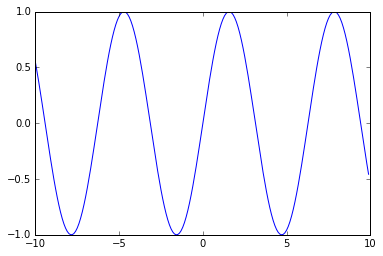

In [39]:
#actually get the concrete values
xvals = sess.run(x)
yvals = sess.run(y)  

#plot them
plt.plot(xvals, yvals)

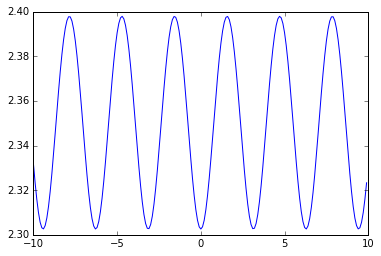

In [40]:
#we can do a more complex function easily
x = tf.range(-10, 10, .1)
y = tf.sin(x)
z = y**2 + 10
w = tf.log(z)
plt.plot(sess.run(x), sess.run(w))

#### Matrix multiplication

In [41]:
#let's recall a little about matrix multiplication in NumPy
rng = np.random.RandomState(0) #create some random data
randarr = rng.uniform(size=(10, 4))
randarr2 = rng.uniform(size=(10, 4))

multarr = randarr * randarr2 #<-- this is elementwise multiplication in numpy
multarr.shape

(10, 4)

In [42]:
#but matrix multiplication ("dot product") clearly doesn't work for these two matrices
multarr = np.dot(randarr, randarr2)
#... because of shape mismatch

ValueError: shapes (10,4) and (10,4) not aligned: 4 (dim 1) != 10 (dim 0)

In [43]:
randarr3 = np.random.RandomState(0).uniform(size=(20, 10))

#this is matrix multiplication in numpy (like we've seen before)
multarr = np.dot(randarr3, randarr)  
multarr.shape

(20, 4)

In [44]:
tf.multiply

<function tensorflow.python.ops.math_ops.multiply>

In [45]:
#now let's do the same thing in tensorflow

mat = tf.constant(randarr)
mat2 = tf.constant(randarr2)
mat3 = tf.constant(randarr3)

mat * mat2  #element-wise multiplcation of the tensorflow objects


<tf.Tensor 'mul_1:0' shape=(10, 4) dtype=float64>

In [46]:
sess.run(mat * mat2 - tf.multiply(mat, mat2))

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [47]:
sess.run(mat + mat2 - tf.add(mat, mat2))

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [48]:
#matrix multiplication in tensorflow is called "matmul"
tf.matmul(mat3, mat)

<tf.Tensor 'MatMul:0' shape=(20, 4) dtype=float64>

#### Image convolution

In [49]:
from PIL import Image

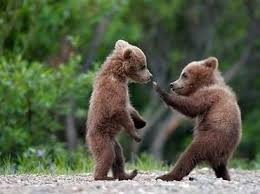

In [50]:
#let's open our two bears image
im = Image.open('two bears.jpg')
im

In [51]:
#let's make it into a float32 array
imarray = np.asarray(im).astype(np.float32)  #numpy
imtensor = tf.constant(imarray)   #now it's in tensorflow
imtensor.shape.as_list()

[194, 260, 3]

In [52]:
#we're going to apply a constant filter to the image on all channels
#the filter is of the form (height, width, in_channels, out_channels)

k = 2  #filter size of 2

#we structure blocks of 3x3 with ones matrices on the diagonal
#and zeros on the off diagonal.   the 3x3 is due to the fcat 
#that images have 3 input channels and want to make an output that is also in image

filterarray = np.array([[np.ones((k, k)), np.zeros((k, k)), np.zeros((k, k))], 
                         [np.zeros((k, k)), np.ones((k, k)), np.zeros((k, k))], 
                         [np.zeros((k, k)), np.zeros((k, k)), np.ones((k, k))]]) / k**2
filterarray = filterarray.transpose(2, 3, 0, 1) #get the dimensions in the right order (height, width, inchannel, outchannel)

In [53]:
filterarray.shape

(2, 2, 3, 3)

In [54]:
#this is a 2x2 constant filter
filterarray[:, :, 1, 1]

array([[ 0.25,  0.25],
       [ 0.25,  0.25]])

In [55]:
filterarray[:, :, 0, 1]

array([[ 0.,  0.],
       [ 0.,  0.]])

('shape = ', (193, 259, 3))


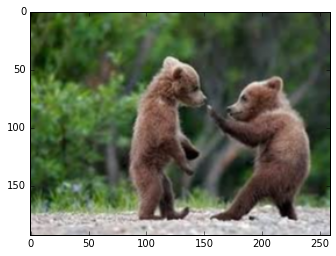

In [56]:
#ok let's apply 2d convolution using this filter
out = tf.nn.conv2d(imtensor[np.newaxis, :], 
                   filterarray,
                   strides=[1, 1, 1, 1],
                   padding='VALID')

#get the output value
outval = sess.run(out)[0]
print('shape = ', outval.shape)
#and look at it
plt.imshow(outval.astype(np.uint8))

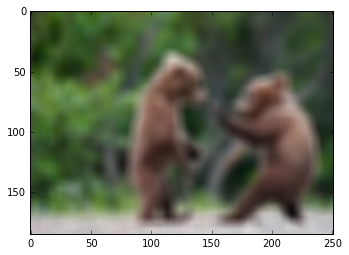

In [57]:
k = 10  #see, if we increase the size of the filter, the image gets blurrier

filterarray = np.array([[np.ones((k, k)), np.zeros((k, k)), np.zeros((k, k))], 
                         [np.zeros((k, k)), np.ones((k, k)), np.zeros((k, k))], 
                         [np.zeros((k, k)), np.zeros((k, k)), np.ones((k, k))]]) / k**2
filterarray = filterarray.transpose(2, 3, 0, 1)

out = tf.nn.conv2d(imtensor[np.newaxis], filterarray, strides=[1, 1, 1, 1], padding='VALID')
outval = sess.run(out)[0]
plt.imshow(outval.astype(np.uint8))

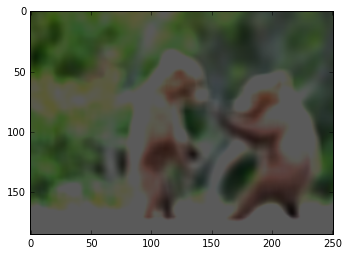

In [58]:
#here we take minimum operation after the convolution -- look at the visual effect it has
k = 10
filterarray = np.array([[np.ones((k, k)), np.zeros((k, k)), np.zeros((k, k))], 
                         [np.zeros((k, k)), np.ones((k, k)), np.zeros((k, k))], 
                         [np.zeros((k, k)), np.zeros((k, k)), np.ones((k, k))]]) / k**2
filterarray = filterarray.transpose(2, 3, 0, 1)

out1 = tf.nn.conv2d(imtensor[np.newaxis], filterarray, strides=[1, 1, 1, 1], padding='VALID')
out2 = tf.minimum(out1, 90)
outval = sess.run(out2)[0]
plt.imshow(outval.astype(np.uint8))

#... in fact, this is (a little bit) like what the output of internal layers of 
#deep nets look like when operating on images

('shape = ', (185, 251, 3))


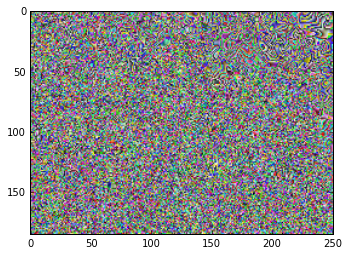

In [59]:
#random filers make what looks like garbage
k = 10
filterarray = np.random.RandomState(0).uniform(size=(k, k, 3, 3))
out = tf.nn.conv2d(imtensor[np.newaxis], filterarray, strides=[1, 1, 1, 1], padding='VALID')
outval = sess.run(out)[0]
print('shape = ', outval.shape)
plt.imshow(outval.astype(np.uint8))

('Shape=', [194, 260])


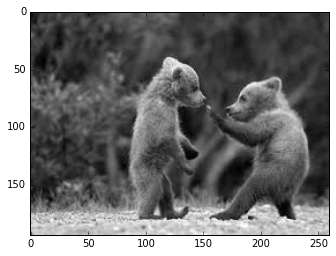

In [60]:
#just for illustration purposes, let's do some matrix multiplication
#the red channel (first channel) is just a 2-d matrix
im_chnl0 = imtensor[:, :, 0]
print('Shape=', im_chnl0.shape.as_list())
plt.imshow(sess.run(im_chnl0), cmap='gray')

In [61]:
#let's multiple our image matrix by a matrix of constant value
onemat = 1./100 * tf.ones(shape=(260, 4))
sess.run(onemat[0])

array([ 0.01,  0.01,  0.01,  0.01], dtype=float32)

In [62]:
#actually do the multiplication
outmat = tf.matmul(im_chnl0 , onemat)
outmat.shape.as_list()

[194, 4]

In [63]:
#adding 3 to show it can be done
outmat1 = tf.matmul(im_chnl0 , onemat) + 3

In [64]:
sess.run(outmat[0])

array([ 183.01005554,  183.01005554,  183.01005554,  183.01005554], dtype=float32)

In [65]:
#see, we added 3....
sess.run(outmat1[0])

array([ 186.01005554,  186.01005554,  186.01005554,  186.01005554], dtype=float32)

### Tensor Variables

In [66]:
#construct a scalar (0-dimensional) variable with name "x"
eks = tf.get_variable('x', shape=(), dtype=tf.float32)

In [67]:
#Yep, it's a variable
eks

<tf.Variable 'x:0' shape=() dtype=float32_ref>

In [68]:
eks.name

u'x:0'

In [69]:
#we can do operations on variables just like we can on constant tensors
why = eks**2

In [70]:
#"why" isn't a variable ... it's just a tensor
why
#this is because "why" doesn't care whether its input was a variable or a constant, it's
#still going to do the same operation regardless. 

<tf.Tensor 'pow_4:0' shape=() dtype=float32>

In [71]:
#this doesn't work yet because eks's value isn't actually specified anyhwere
sess.run(eks)

FailedPreconditionError: Attempting to use uninitialized value x
	 [[Node: _retval_x_0_0 = _Retval[T=DT_FLOAT, index=0, _device="/job:localhost/replica:0/task:0/device:CPU:0"](x)]]

In [72]:
#we specify it to the runner by using a "feed_dict"
sess.run(eks, feed_dict={eks: 8})

array(8.0, dtype=float32)

In [73]:
#we can get anything computed from "eks" (such as "why") as long as we specify
#the value for eks.   this is like "feeding the roots" of the computational graph
#and then looking at some downstream leaf's value
sess.run(why, feed_dict={eks: 8})

64.0

In [74]:
zee = why + 3

In [75]:
sess.run(zee, feed_dict={eks: 8})

67.0

In [76]:
sess.run(zee, feed_dict={why: 8})

11.0

In [77]:
sess.run(zee, feed_dict={zee: 8})

array(8.0, dtype=float32)

In [78]:
#not allowed to use the same variable name willy-nilly ("x" was already used above)
xarr = tf.get_variable('x', shape=(10, 4, 5), dtype=tf.float32)

ValueError: Variable x already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "<ipython-input-66-26632c5060aa>", line 2, in <module>
    eks = tf.get_variable('x', shape=(), dtype=tf.float32)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):


In [79]:
#so let's call it something else
x_arr = tf.get_variable('x_arr', shape=(10, 4, 5), dtype=tf.float32)
#... and make in a 3-tensor

In [80]:
#of course, we can still compute the square
y_arr = x_arr**2

In [81]:
#and get the actual value
randarray = np.random.uniform(size=(10, 4, 5), low=-1, high=1)

y_val = sess.run(y_arr, feed_dict = {x_arr: randarray})

In [82]:
y_val[0]

array([[ 0.67514372,  0.60161114,  0.48406971,  0.1597174 ,  0.83723706],
       [ 0.30268133,  0.60071754,  0.22192249,  0.08965681,  0.09227741],
       [ 0.29598868,  0.20112868,  0.04500304,  0.78373635,  0.00265223],
       [ 0.01524266,  0.00238395,  0.03610126,  0.22859401,  0.09538959]], dtype=float32)

### Constructing something simple -- SVM hinge loss

In [83]:
#ok let's load the neural data 
DATA_PATH = "/home/chengxuz/Class/psych253_2018/data/ventral_neural_data.hdf5"
Ventral_Dataset = h5py.File(DATA_PATH)

categories = Ventral_Dataset['image_meta']['category'][:]   #array of category labels for all images  --> shape == (5760,)
unique_categories = np.unique(categories)                #array of unique category labels --> shape == (8,)

Neural_Data = Ventral_Dataset['time_averaged_trial_averaged'][:]

num_neurons = Neural_Data.shape[1]
num_categories = 8 

In [84]:
categories[[0, 1200, 2304]]

array(['Fruits', 'Animals', 'Cars'],
      dtype='|S7')

In [85]:
#we'll construct 8 one-vs-all binary-valued vectors
category_matrix = np.array([categories == c for 
                             c in unique_categories]).T.astype(int)

In [86]:
#... one for each category
category_matrix.shape

(5760, 8)

In [87]:
#right, this first image is a fruit (5th category)
category_matrix[0]

array([0, 0, 0, 0, 0, 1, 0, 0])

In [88]:
#we're not going to process all the images at once, so we batch them up
#... the size of the batches is going to be 256
batch_size = 256

In [89]:
#let's set up some our key variables
weights = tf.get_variable('weights', 
                          shape=(num_neurons, num_categories),
                          dtype=tf.float32)

bias = tf.get_variable('bias', 
                       shape=(num_categories,),
                       dtype=tf.float32)

In [90]:
#and placeholder variables as roots of the computation graph
#to receive the inputs
neural_data = tf.get_variable('neural_data',
                              shape=(batch_size, num_neurons),
                              dtype=tf.float32)

In [91]:
category_labels = tf.get_variable('category_labels',
                                 shape=(batch_size, num_categories),
                                 dtype=tf.float32)

In [92]:
#out margins formula is really simple
margins = tf.matmul(neural_data, weights) + bias

In [93]:
#as is the SVM hinge loss
hinge_loss = tf.maximum(0., 1. - category_labels * margins)

In [94]:
#let's actually compute it
#to do that we have to stick in some values for the weights, bias, and data
rng = np.random.RandomState(0)

initial_weights = rng.uniform(size=(num_neurons, num_categories),
                              low=-1,
                              high=1)

initial_bias = np.zeros((num_categories,))
                             
data_batch = Neural_Data[0: batch_size]
label_batch = category_matrix[0: batch_size]
        

In [95]:
loss_val = sess.run(hinge_loss, feed_dict={weights: initial_weights,
                                           bias: initial_bias,
                                           neural_data: data_batch,
                                           category_labels: label_batch})
loss_val.shape
#ok it's at least the right shape (data_batch, num_categories)

(256, 8)

In [96]:
loss_val[0]

array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        5.32714176,  1.        ,  1.        ], dtype=float32)

### Actually using trainable variables

In [97]:
#as we'll see more next time its useful to separate the parameters
#of the model from the real "data" inputs and make the parameters
#(such as the weights and biases) initialize without feeding using the feed_dict

#let's use the tensorflow random uniform sampler to initialize weight balues
initial_weights = tf.random_uniform(shape=(num_neurons, num_categories),
                  minval=-1,
                  maxval=1,
                  seed=0)

In [98]:
sess.run(initial_weights[0])

array([-0.79827476,  0.9403336 ,  0.69752836, -0.90343738, -0.90295386,
        0.55494928,  0.688936  , -0.16585016], dtype=float32)

In [99]:
#see if you run it twice without resetting the seed you get different values
sess.run(initial_weights[0])

array([ 0.03105211,  0.75788879,  0.08570004,  0.44977117, -0.61937523,
        0.8424499 ,  0.1591475 ,  0.41482568], dtype=float32)

In [100]:
initial_bias = tf.zeros(shape=(num_categories,))

In [101]:
#same idea as before -- we're initializing the weights but now with an 
#initializer as opposed to by hand
weights = tf.get_variable('weights_for_real', 
                           dtype=tf.float32,
                           initializer=initial_weights)
                         
bias = tf.get_variable('bias_for_real', 
                       dtype=tf.float32,
                       initializer=initial_bias)

In [102]:
initialize_op = tf.global_variables_initializer()
sess.run(initialize_op)
sess.run(weights)

array([[-0.86808681,  0.73820186, -0.9922967 , ..., -0.18857431,
         0.12306046,  0.18952942],
       [ 0.11023068, -0.15810513, -0.21550941, ...,  0.34239602,
         0.07066655,  0.48793697],
       [ 0.27729702,  0.44688106,  0.74186563, ..., -0.43696022,
        -0.83818936, -0.32810926],
       ..., 
       [-0.90881634,  0.96538019, -0.03059149, ..., -0.11946988,
        -0.65008259, -0.96437216],
       [ 0.75305009,  0.25409794,  0.16923451, ...,  0.32856083,
        -0.18022251, -0.92924261],
       [-0.66314578, -0.15705562, -0.67897224, ...,  0.56468797,
        -0.68454051, -0.77280378]], dtype=float32)

In [103]:
sess.run(weights)

array([[-0.86808681,  0.73820186, -0.9922967 , ..., -0.18857431,
         0.12306046,  0.18952942],
       [ 0.11023068, -0.15810513, -0.21550941, ...,  0.34239602,
         0.07066655,  0.48793697],
       [ 0.27729702,  0.44688106,  0.74186563, ..., -0.43696022,
        -0.83818936, -0.32810926],
       ..., 
       [-0.90881634,  0.96538019, -0.03059149, ..., -0.11946988,
        -0.65008259, -0.96437216],
       [ 0.75305009,  0.25409794,  0.16923451, ...,  0.32856083,
        -0.18022251, -0.92924261],
       [-0.66314578, -0.15705562, -0.67897224, ...,  0.56468797,
        -0.68454051, -0.77280378]], dtype=float32)

In [104]:
#have to reconstruct the margins and loss now that "weights" and "bias" 
#have been redefined

margins = tf.matmul(neural_data, weights) + bias

hinge_loss = tf.maximum(0., 1. - category_labels * margins)

In [106]:
#ok we should be able to run this without feeding the parameters

loss_val = sess.run(hinge_loss, feed_dict={neural_data: data_batch,
                                           category_labels: label_batch})
loss_val.shape

(256, 8)

### Getting gradients

In [107]:
#now let's look at how to get derivatives automatically with tensorflow

#we want to get back the variable named "x" 
#that we defined before .... here's how to do it 
#without getting the "already define" error

with tf.variable_scope('', reuse=True):
    x = tf.get_variable('x')

In [108]:
#define an operation on top of the variable "x"
y = x**2

In [109]:
#let's compute the gradient of y wrt to x
grad = tf.gradients(y, x)

In [110]:
grad[0]

<tf.Tensor 'gradients/pow_6_grad/Reshape:0' shape=() dtype=float32>

In [111]:
#derivative at x = 0
sess.run(grad, feed_dict = {x: 0})

[0.0]

In [112]:
#derivative at x = 1
sess.run(grad, feed_dict = {x: 1})

[2.0]

In [113]:
#derivative at x = 2
sess.run(grad, feed_dict = {x: 2})

[4.0]

In [114]:
#derivative at x = 3
sess.run(grad, feed_dict = {x: 3})

[6.0]

In [115]:
#let's get derivatives at a bunch of locations

#first we construct the computation graph:
x_arr = tf.get_variable('x_arr2', shape=(100,), dtype=tf.float32)
y_arr = x_arr**2
grad_array = tf.gradients(y_arr, x_arr)

In [118]:
#it's a tensorflow tensor (duh)
grad_array

[<tf.Tensor 'gradients_1/pow_7_grad/Reshape:0' shape=(100,) dtype=float32>]

In [119]:
#now let's feed in some data
x_vals = np.arange(-5, 5, .1)
funcval = sess.run(y_arr, feed_dict = {x_arr: x_vals})
gradval = sess.run(grad_array, feed_dict = {x_arr: x_vals})[0]

In [120]:
type([y_arr, grad_array])

list

In [121]:
#or we could have equally well have done
funcval, gradval = sess.run([y_arr, grad_array], feed_dict={x_arr: x_vals})
gradval = gradval[0]

In [122]:
#or we could have equally well have done
out = sess.run({'funcval': y_arr, 'gradval': grad_array}, feed_dict={x_arr: x_vals})
funcval = out['funcval']
gradval = out['gradval'][0]

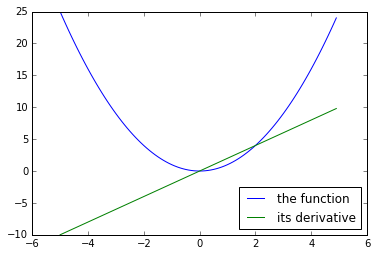

In [123]:
plt.plot(x_vals, funcval, label='the function')
plt.plot(x_vals, gradval, label='its derivative')
plt.legend(loc='lower right')

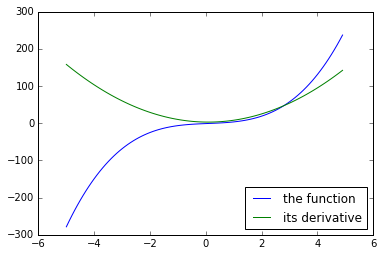

In [124]:
#this is the tensorflow "model" definition
y_arr = 2*x_arr**3 - .5*x_arr**2 + 3*x_arr - 1

#and here's the model's derivative
grad_array = tf.gradients(y_arr, x_arr)

#now let's stick in some values
x_vals = np.arange(-5, 5, .1)
funcval = sess.run(y_arr, feed_dict = {x_arr: x_vals})
gradval = sess.run(grad_array, feed_dict = {x_arr: x_vals})[0]

#and plot it
plt.plot(x_vals, funcval, label='the function')
plt.plot(x_vals, gradval, label='its derivative')
plt.legend(loc='lower right')

In [125]:
x_arr

<tf.Variable 'x_arr2:0' shape=(100,) dtype=float32_ref>

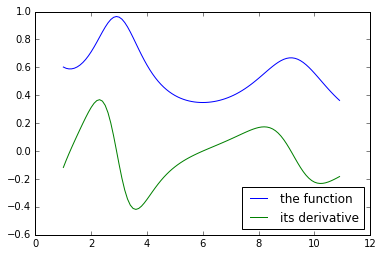

In [126]:
y = x_arr**.5
z = tf.log(tf.exp(tf.sin(y) + tf.cos(2*y)) + 1)
w = z / (y + tf.cos(x_arr))

grad_array = tf.gradients(w, x_arr)

x_vals = np.arange(1, 11, .1)
funcval, gradval = sess.run([w, grad_array], feed_dict = {x_arr: x_vals})
gradval = gradval[0]

plt.plot(x_vals, funcval, label='the function')
plt.plot(x_vals, gradval, label='its derivative')
plt.legend(loc='lower right')

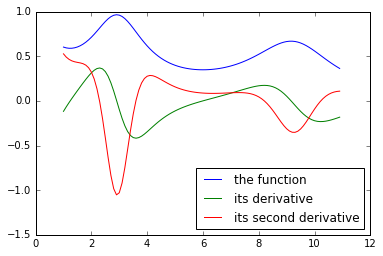

In [127]:
y = x_arr**.5
z = tf.log(tf.exp(tf.sin(y) + tf.cos(2*y)) + 1)
w = z / (y + tf.cos(x_arr))

grad_array = tf.gradients(w, x_arr)
#the second derivative is of course just the derivative of the first derivative
grad2_array = tf.gradients(grad_array, x_arr)

x_vals = np.arange(1, 11, .1)
funcval, gradval, grad2val = sess.run([w, grad_array, grad2_array], feed_dict = {x_arr: x_vals})
gradval = gradval[0]
grad2val = grad2val[0]

plt.plot(x_vals, funcval, label='the function')
plt.plot(x_vals, gradval, label='its derivative')
plt.plot(x_vals, grad2val, label='its second derivative')
plt.legend(loc='lower right')

In [128]:
grad_array[0].name

u'gradients_4/AddN_1:0'

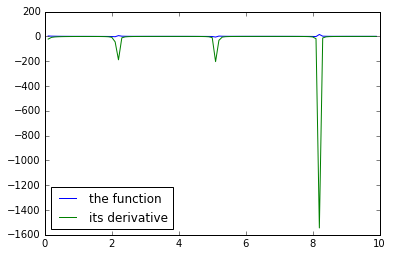

In [129]:
y = x_arr**(.5)
z = tf.log(tf.exp(tf.sin(y) + tf.cos(2*y)) + 1)
w = z / (y + tf.tan(x_arr))

grad_array = tf.gradients(w, x_arr)

x_vals = np.arange(0, 10, .1)
funcval = sess.run(w, feed_dict = {x_arr: x_vals})
gradval = sess.run(grad_array, feed_dict = {x_arr: x_vals})[0]

plt.plot(x_vals, funcval, label='the function')
plt.plot(x_vals, gradval, label='its derivative')
plt.legend(loc='lower left')

In [130]:
#let's make some cool plots of derivative surfaces for multivariable functions

#import some 3-D plotting tools
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [131]:
xa = tf.get_variable('var_x', shape=(40000,), dtype=tf.float32)
ya = tf.get_variable('var_y', shape=(40000,), dtype=tf.float32)

#this is a parabolic surface:
za = xa**2 + ya**2

grad_array = tf.gradients(za, [xa, ya])

In [134]:
#derivative wrt the first variable
grad_array[0]

<tf.Tensor 'gradients_7/pow_13_grad/Reshape:0' shape=(40000,) dtype=float32>

In [135]:
#derivative wrt the second variable
grad_array[1]

<tf.Tensor 'gradients_7/pow_14_grad/Reshape:0' shape=(40000,) dtype=float32>

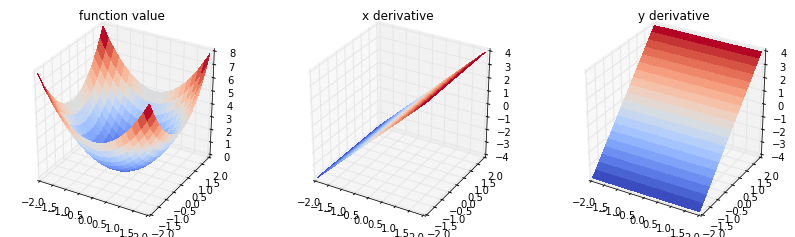

In [136]:
#let's do some plotting 

za = xa**2 + ya**2
grad_array = tf.gradients(za, [xa, ya])

x_vals = np.arange(-2, 2, .02)
y_vals = np.arange(-2, 2, .02)
xv, yv = np.meshgrid(x_vals, y_vals)
funcval = sess.run(za, feed_dict = {xa: xv.ravel(), ya: yv.ravel()})
gradval = sess.run(grad_array, feed_dict = {xa: xv.ravel(), ya: yv.ravel()})

fig = plt.figure(figsize=(14, 4))
ax = plt.subplot(1, 3, 1, projection='3d')
ax.plot_surface(xv, yv, funcval.reshape((200, 200)), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title('function value')
ax = plt.subplot(1, 3, 2, projection='3d')
ax.plot_surface(xv, yv, gradval[0].reshape((200, 200)), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title('x derivative')
ax = plt.subplot(1, 3, 3, projection='3d')
ax.plot_surface(xv, yv, gradval[1].reshape((200, 200)), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title('y derivative')



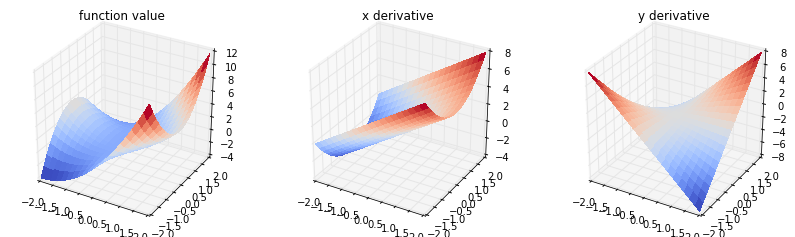

In [137]:
#a more complex function

za = xa**2 + ya**2 * xa
grad_array = tf.gradients(za, [xa, ya])

x_vals = np.arange(-2, 2, .02)
y_vals = np.arange(-2, 2, .02)
xv, yv = np.meshgrid(x_vals, y_vals)
funcval = sess.run(za, feed_dict = {xa: xv.ravel(), ya: yv.ravel()})
gradval = sess.run(grad_array, feed_dict = {xa: xv.ravel(), ya: yv.ravel()})

fig = plt.figure(figsize=(14, 4))
ax = plt.subplot(1, 3, 1, projection='3d')
ax.plot_surface(xv, yv, funcval.reshape((200, 200)), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title('function value')
ax = plt.subplot(1, 3, 2, projection='3d')
ax.plot_surface(xv, yv, gradval[0].reshape((200, 200)), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title('x derivative')
ax = plt.subplot(1, 3, 3, projection='3d')
ax.plot_surface(xv, yv, gradval[1].reshape((200, 200)), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title('y derivative')



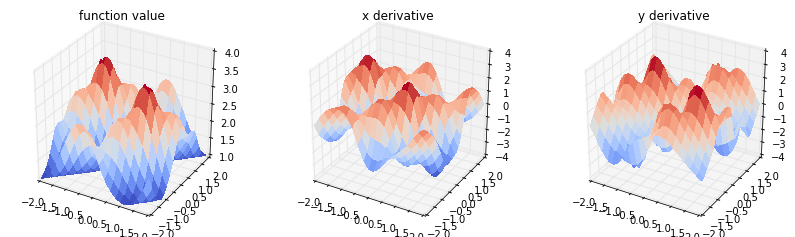

In [138]:
#an even more complex function 

za = tf.cosh((3 + tf.cos(xa+2*ya)**3)**.5 * tf.sin(ya-xa))

grad_array = tf.gradients(za, [xa, ya])

x_vals = np.arange(-2, 2, .02)
y_vals = np.arange(-2, 2, .02)
xv, yv = np.meshgrid(x_vals, y_vals)
funcval = sess.run(za, feed_dict = {xa: xv.ravel(), ya: yv.ravel()})
gradval = sess.run(grad_array, feed_dict = {xa: xv.ravel(), ya: yv.ravel()})

fig = plt.figure(figsize=(14, 4))
ax = plt.subplot(1, 3, 1, projection='3d')
ax.plot_surface(xv, yv, funcval.reshape((200, 200)), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title('function value')
ax = plt.subplot(1, 3, 2, projection='3d')
ax.plot_surface(xv, yv, gradval[0].reshape((200, 200)), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title('x derivative')
ax = plt.subplot(1, 3, 3, projection='3d')
ax.plot_surface(xv, yv, gradval[1].reshape((200, 200)), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title('y derivative')


# Dataset Objects

In [5]:
#ok now we'll move from abstract computations to working with some real data
#this is the imageset MNIST.  see
#        http://yann.lecun.com/exdb/mnist/
#we've provided a convenient package for creating a tensorflow Dataset object from the MNIST data

import mnist_data

In [6]:
#helper routines for creating mnist dataset object in tensorflow
mnist_data??

In [75]:
#this function downloads the data automatically if it's not there
mnist_data.download??

In [76]:
#this function decodes from downloaded files and applies preprocessing
#dataset calls mnist_data.download to download the data if needed
mnist_data.dataset??

In [78]:
#this function creates calles the abovebatches and an iterator
#this function calls mnist_data.dataset as a helper
mnist_data.build_data??

In [6]:
#here's where we want the data to be downloaded to
data_dir = '/mnt/data/yamins/mnist_data'

In [146]:
train_data = mnist_data.build_data(directory=data_dir,
                                   batch_size=100,
                                   group='train')

In [147]:
test_data = mnist_data.build_data(directory=data_dir,
                                   batch_size=100,
                                   group='test')

In [194]:
#this creates a tensorflow iterator object
train_data

{'images': <tf.Tensor 'IteratorGetNext_5:0' shape=(100, 784) dtype=float32>,
 'labels': <tf.Tensor 'IteratorGetNext_5:1' shape=(100,) dtype=int32>}

In [7]:
test_data

{'images': <tf.Tensor 'IteratorGetNext_1:0' shape=(100, 784) dtype=float32>,
 'labels': <tf.Tensor 'IteratorGetNext_1:1' shape=(100,) dtype=int32>}

In [8]:
train_data['images']

<tf.Tensor 'IteratorGetNext:0' shape=(100, 784) dtype=float32>

In [149]:
#sess.run'ing the train data creates a batch of actual data
train_batch = sess.run(train_data)

In [19]:
train_batch

{'images': array([[-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        ...,
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5]], dtype=float32),
 'labels': array([4, 6, 4, 0, 9, 8, 8, 3, 7, 8, 5, 6, 7, 0, 6, 4, 0, 6, 6, 7, 5, 6,
        2, 4, 0, 3, 9, 6, 9, 0, 1, 2, 1, 4, 8, 2, 3, 1, 8, 4, 6, 1, 6, 8,
        8, 3, 8, 5, 8, 1, 8, 3, 2, 5, 6, 7, 3, 9, 7, 8, 0, 7, 0, 1, 3, 0,
        2, 1, 7, 0, 6, 9, 2, 6, 7, 1, 6, 5, 1, 6, 0, 3, 0, 1, 1, 4, 8, 5,
        0, 8, 0, 7, 8, 6, 5, 1, 3, 6, 8, 1], dtype=int32)}

In [20]:
#shape is 100 images x 784 pixels (coming rom the 28x28 images in mnist)
train_batch['images'].shape

(100, 784)

In [21]:
train_batch['labels'].shape

(100,)

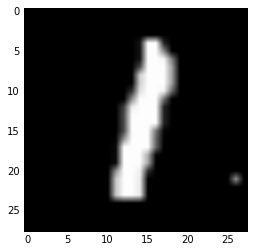

In [150]:
#let's actually look at an image
im_array = train_batch['images'][0].reshape((28, 28))
plt.imshow(im_array, cmap='gray')

In [151]:
train_batch['labels'][0]
#ok!

1

In [152]:
#calling this iterates the data to the next batch
next_train_batch = sess.run(train_data)

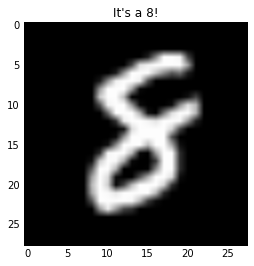

In [153]:
im_array = next_train_batch['images'][0].reshape((28, 28))
plt.imshow(im_array, cmap='gray')
plt.title("It's a %d!" % next_train_batch['labels'][0])

# Model construction functions

In [154]:
#this module contains definitiosn for some simple models
#that are convenient to work with
import model_tool

In [ ]:
model_tool??

In [84]:
model_tool.mnist??

In [ ]:
model_tool.alexnet??

In [155]:
#actually construct the model, with the "mnist_model" scope
with tf.variable_scope(None, "mnist_model") as scope:
    mnist_model = model_tool.mnist(train_data['images'], train=True)

INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


In [10]:
#it's a "convnet" object
mnist_model

In [158]:
#here's the actual output node
output_node = mnist_model.output

In [12]:
output_node.name

u'mnist_model/softmax_linear_bias:0'

In [13]:
#we can "follow up" the graph from the output node
#to look at what its inputs where
list(output_node.op.inputs)

[<tf.Tensor 'mnist_model/softmax_linear_mult:0' shape=(100, 10) dtype=float32>,
 <tf.Tensor 'mnist_model/softmax_linear/bias/read:0' shape=(10,) dtype=float32>]

In [14]:
#and so on ... 
softmax_node = output_node.op.inputs[0]
list(softmax_node.op.inputs[0].op.inputs)

[<tf.Tensor 'mnist_model/mnist_model/hidden2_bias__0_relu:0' shape=(100, 32) dtype=float32>,
 <tf.Tensor 'mnist_model/reshape_2/shape:0' shape=(2,) dtype=int32>]

In [15]:
#... and on ... 
hidden2_node = softmax_node.op.inputs[0]
list(hidden2_node.op.inputs[0].op.inputs[0].op.inputs)

[<tf.Tensor 'mnist_model/hidden2_mult:0' shape=(100, 32) dtype=float32>,
 <tf.Tensor 'mnist_model/hidden2/bias/read:0' shape=(32,) dtype=float32>]

In [16]:
# ... and on ...
hidden2_mult = hidden2_node.op.inputs[0].op.inputs[0].op.inputs
list(hidden2_mult[0].op.inputs[0].op.inputs)
#... and so forth

[<tf.Tensor 'mnist_model/mnist_model/hidden1_bias__0_relu:0' shape=(100, 128) dtype=float32>,
 <tf.Tensor 'mnist_model/reshape_1/shape:0' shape=(2,) dtype=int32>]

In [19]:
#here's how to list all the mnist_model-related computational elements 
#that have been constructed so far
[n.name for n in tf.get_default_graph().as_graph_def().node if 'mnist' in n.name]

[u'mnist_model/reshape/shape',
 u'mnist_model/reshape',
 u'mnist_model/hidden1/weights/Initializer/random_uniform/shape',
 u'mnist_model/hidden1/weights/Initializer/random_uniform/min',
 u'mnist_model/hidden1/weights/Initializer/random_uniform/max',
 u'mnist_model/hidden1/weights/Initializer/random_uniform/RandomUniform',
 u'mnist_model/hidden1/weights/Initializer/random_uniform/sub',
 u'mnist_model/hidden1/weights/Initializer/random_uniform/mul',
 u'mnist_model/hidden1/weights/Initializer/random_uniform',
 u'mnist_model/hidden1/weights',
 u'mnist_model/hidden1/weights/Assign',
 u'mnist_model/hidden1/weights/read',
 u'mnist_model/hidden1/bias/Initializer/Const',
 u'mnist_model/hidden1/bias',
 u'mnist_model/hidden1/bias/Assign',
 u'mnist_model/hidden1/bias/read',
 u'mnist_model/hidden1_mult',
 u'mnist_model/hidden1_bias',
 u'mnist_model/mnist_model/hidden1_bias__0_relu',
 u'mnist_model/reshape_1/shape',
 u'mnist_model/reshape_1',
 u'mnist_model/hidden2/weights/Initializer/random_uniform

In [30]:
#let's get some output 

output = sess.run(mnist_model.output)
#oops we forgot to initialize the variables in the newly created model

FailedPreconditionError: Attempting to use uninitialized value mnist_model_1/hidden1/bias
	 [[{{node mnist_model_1/hidden1/bias/read}} = Identity[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](mnist_model_1/hidden1/bias)]]

Caused by op u'mnist_model_1/hidden1/bias/read', defined at:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python2.7/dist-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-29-5c0c1f38fea2>", line 2, in <module>
    mnist_model = model_tool.mnist(train_data['images'], train=True)
  File "model_tool.py", line 312, in mnist
    m.fc(128, layer='hidden1', in_layer=inputs, **fc_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/contrib/framework/python/ops/arg_scope.py", line 182, in func_with_args
    return func(*args, **current_args)
  File "model_tool.py", line 190, in fc
    name='bias')
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/variable_scope.py", line 1484, in get_variable
    aggregation=aggregation)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/variable_scope.py", line 1234, in get_variable
    aggregation=aggregation)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/variable_scope.py", line 538, in get_variable
    aggregation=aggregation)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/variable_scope.py", line 492, in _true_getter
    aggregation=aggregation)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/variable_scope.py", line 920, in _get_single_variable
    aggregation=aggregation)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/variables.py", line 145, in __call__
    return cls._variable_call(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/variables.py", line 141, in _variable_call
    aggregation=aggregation)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/variables.py", line 120, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/variable_scope.py", line 2441, in default_variable_creator
    expected_shape=expected_shape, import_scope=import_scope)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/variables.py", line 147, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/variables.py", line 1104, in __init__
    constraint=constraint)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/variables.py", line 1266, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/array_ops.py", line 81, in identity
    return gen_array_ops.identity(input, name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/gen_array_ops.py", line 3354, in identity
    "Identity", input=input, name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 3272, in create_op
    op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 1768, in __init__
    self._traceback = tf_stack.extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value mnist_model_1/hidden1/bias
	 [[{{node mnist_model_1/hidden1/bias/read}} = Identity[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](mnist_model_1/hidden1/bias)]]


In [156]:
#so now we initialize...
initialize_op = tf.global_variables_initializer()
sess.run(initialize_op)

In [159]:
#ok now it works
output = sess.run(output_node)

In [33]:
#its got shape (100, 10)...
output.shape
#... because for each of the 100 input images, the model output is 
#a set of 10 logits (one for each of the 10 classes of digits from "0" to "9")

(100, 10)

In [34]:
#right, it's a bunch of unnormalized logits ... 
output[0]


array([-1.344377  , -0.60756326,  4.447754  ,  1.8087065 ,  0.57027125,
       -0.33371854,  2.1149154 ,  3.6897724 , -0.39251268, -0.857854  ],
      dtype=float32)

### loss functions

In [179]:
#we actually have to compute a loss, in this case the natural thing
#is cross entropy loss.  
#If you're not familiar with cross-entropy loss, see:
#    http://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html

#here's the tensorflow cross entropy function
tf.nn.sparse_softmax_cross_entropy_with_logits?

In [12]:
#we create the loss node by applying the loss function to the model output (the logits)
#and the data (the labels)
loss = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=mnist_model.output,
                                                      labels=train_data['labels'])

In [200]:
loss

<tf.Tensor 'SparseSoftmaxCrossEntropyWithLogits_3/SparseSoftmaxCrossEntropyWithLogits:0' shape=(100,) dtype=float32>

In [13]:
#what is the loss when actually run?
sess.run(loss)
#it's a 100-vector -- one loss value for each of the 100 images in the batch

array([4.1857624 , 3.166215  , 6.362944  , 6.998981  , 2.7492204 ,
       0.08110362, 2.9179153 , 0.25784296, 6.50381   , 4.3143954 ,
       3.375243  , 0.15816538, 6.444466  , 3.5457535 , 5.402739  ,
       5.3106775 , 4.517053  , 3.6843429 , 6.4250927 , 5.243892  ,
       5.1412854 , 5.203358  , 6.013208  , 0.12233831, 4.667589  ,
       6.2042108 , 4.875552  , 2.8468914 , 6.1758013 , 3.6029348 ,
       4.9181685 , 5.2589707 , 7.085137  , 6.9586596 , 6.238118  ,
       7.3417697 , 5.8640366 , 5.7290473 , 6.153814  , 0.19827949,
       4.7325287 , 5.704428  , 3.3146467 , 3.9905934 , 6.8416905 ,
       6.005399  , 4.125486  , 4.1920123 , 0.34860897, 4.8033633 ,
       0.14462553, 6.353418  , 5.8699484 , 5.712943  , 4.5744743 ,
       4.9501038 , 2.9747188 , 4.7487063 , 0.11155334, 6.2254786 ,
       4.2789173 , 5.520561  , 5.829273  , 3.3314183 , 4.72856   ,
       5.607365  , 5.327332  , 2.4152231 , 5.001357  , 0.12551871,
       5.8918023 , 6.8274555 , 6.597337  , 3.6843855 , 5.94541

In [14]:
#next time it's run it has loss for the next 100 images
sess.run(loss)

array([2.2690837 , 5.696316  , 4.7010193 , 6.039781  , 2.1790917 ,
       5.4789205 , 6.853504  , 6.7973404 , 7.120091  , 5.7259803 ,
       4.930848  , 2.9920642 , 3.8511653 , 7.131039  , 4.8411336 ,
       6.2858906 , 5.311133  , 0.17263809, 4.7432623 , 6.832133  ,
       2.721111  , 4.9615483 , 6.7293243 , 0.14076225, 3.7782733 ,
       0.12139464, 3.7374663 , 5.810458  , 7.1701927 , 6.1531186 ,
       2.4896948 , 0.23100168, 2.9947333 , 5.861878  , 5.955715  ,
       6.5393367 , 5.7362685 , 5.5869174 , 0.33367038, 5.1703267 ,
       4.8536773 , 4.214142  , 3.2300549 , 7.320761  , 5.73688   ,
       0.14455104, 3.1446211 , 3.7501156 , 4.464552  , 4.6078615 ,
       6.093422  , 2.7198744 , 6.363327  , 3.100411  , 6.4168663 ,
       6.8003397 , 5.567959  , 7.0157557 , 6.7360654 , 5.004889  ,
       5.0325117 , 7.6113453 , 5.178696  , 0.16271736, 5.9978447 ,
       6.025825  , 3.3896492 , 6.6244226 , 6.4626994 , 2.6642509 ,
       0.12198393, 4.5897856 , 0.16757338, 4.440391  , 6.32640

In [15]:
#we're really interested in minimizing a single scalar, of course #
# --- the *mean loss* across each batch 

mean_loss = tf.reduce_mean(loss)

In [16]:
sess.run(mean_loss)

4.9359074

### optimizers

In [ ]:
#but to actually minimize the loss we need create an optimizer

In [16]:
#first we create a global step variable, 
#which describes what optimization step the system will be
# -- of course, it's initialized to start at step 0 

global_step = tf.get_variable('global_step', 
                              [],
                              dtype=tf.int64, 
                              trainable=False,
                              initializer=tf.constant_initializer(0))

In [17]:
#we also need to create a learning rate schedule
#this is an exponential decay schedule with initial learning rate 0.01

learning_rate = tf.train.exponential_decay(global_step=global_step,
                                           learning_rate=0.01,
                                           decay_steps=10000 / 100,
                                           decay_rate=0.95,
                                           staircase=True)

In [18]:
#we can create the optimizer ... 
optimizer = tf.train.MomentumOptimizer(momentum=0.9, 
                                       learning_rate=learning_rate)

In [19]:
#... and actually get the operation that needs to be run to do the state update 
optimizer_node = optimizer.minimize(mean_loss, global_step=global_step)

In [20]:
#gotta initialize new variables (e.g learning rate, global_step)
initialize_op = tf.global_variables_initializer()
sess.run(initialize_op)

In [21]:
#now let's actually call the optimizer
#just by calling it, the parameters are changed and the optimization happens

for _ind in range(5000):
    lossval, _discard = sess.run([mean_loss, 
                                  optimizer_node])
    if _ind % 100 == 0:
        print('loss = %.3f' % lossval)
        
#note that if hadn't included "optimizer_node" in the sess.run call inside the loop
#nothing would have happened -- loss would not go down, because no actual parameter update would 
#occur. 

loss = 3.192
loss = 0.577
loss = 0.271
loss = 0.517
loss = 0.273
loss = 0.221
loss = 0.425
loss = 0.199
loss = 0.281
loss = 0.252
loss = 0.299
loss = 0.242
loss = 0.222
loss = 0.391
loss = 0.218
loss = 0.238
loss = 0.264
loss = 0.088
loss = 0.198
loss = 0.158
loss = 0.112
loss = 0.122
loss = 0.071
loss = 0.107
loss = 0.303
loss = 0.215
loss = 0.098
loss = 0.079
loss = 0.372
loss = 0.179
loss = 0.116
loss = 0.142
loss = 0.127
loss = 0.103
loss = 0.098
loss = 0.147
loss = 0.158
loss = 0.122
loss = 0.051
loss = 0.061
loss = 0.107
loss = 0.138
loss = 0.098
loss = 0.050
loss = 0.155
loss = 0.187
loss = 0.108
loss = 0.223
loss = 0.128
loss = 0.204


### Mongodb basics

In [160]:
#TFUtils uses Mongodb as the backend storage datase.  Here are some basics about it. 
#You can also see:
#   http://api.mongodb.com/python/current/tutorial.html

#Note that the rest of this tutorial assumes you have a mongodb instance running 
#on the local machine ('localhost') at port 29101. 

In [142]:
#import the python mongodb driver
import pymongo as pm

In [143]:
#connect to the databas at address localhost:29101
connection = pm.MongoClient(host='localhost', port=29101)
#... for this to work, you have to actually have a mongodb running on your machine

In [144]:
#remove (if needed) and construct the database we'll use for this tutorial purpose
connection.drop_database('test_database_for_cs375_lecture')
new_database = connection['test_database_for_cs375_lecture']

In [62]:
new_database.name

u'test_database_for_cs375_lecture'

In [63]:
new_collection = new_database['test_collection']

In [64]:
new_collection.name

u'test_collection'

In [65]:
#create a new document ... 
document = {'a': 1, 'b': 1}

#... and actually insert it into the database
new_collection.insert_one(document)

In [67]:
new_collection.count()

1

In [68]:
record = new_collection.find_one()

In [69]:
#the inserted record has a unique _id value automatically assigned to it
record

{u'_id': ObjectId('5bb3fe5b61bb4e30f6453ff1'), u'a': 1, u'b': 1}

In [70]:
record['_id']

ObjectId('5bb3fe5b61bb4e30f6453ff1')

In [72]:
doc1 = {'a': 1, 'b': 2}
new_collection.insert_one(doc1)

doc2 = {'a': 2, 'b': 1}
new_collection.insert_one(doc2)

In [73]:
new_collection.count()

4

In [74]:
doc3 = {'a': 2, 'b': {'b1': 10, 'b2': 3}}
new_collection.insert_one(doc3)

In [75]:
#let's query our database 
query = {'a': 2}

cursor = new_collection.find(query)

In [76]:
#two items match the query
cursor.count()

2

In [77]:
#one item matching the query ... 
cursor.next()

{u'_id': ObjectId('5bb3fe6761bb4e30f6453ff4'), u'a': 2, u'b': 1}

In [78]:
#another item matching the query
cursor.next()

{u'_id': ObjectId('5bb3fe6c61bb4e30f6453ff5'),
 u'a': 2,
 u'b': {u'b1': 10, u'b2': 3}}

In [79]:
#oops ... no more items matching the query
cursor.next()

StopIteration: 

In [80]:
#a more sophisticated nested query
query = {'b.b1': 10}

cursor = new_collection.find(query)

cursor.count()

1

In [81]:
#querying for whether the "a" field exists:
query = {'a': {'$exists': True}}

cursor = new_collection.find(query)

cursor.count()

5

In [84]:
#for where the nested b.b1 field does NOT exist
query = {'b.b1': {'$exists': False}}

cursor = new_collection.find(query)

cursor.count()

4

In [85]:
doc4 = {'a': 2, 'b': {'b1': 10, 'b2': 5}}
new_collection.insert_one(doc4)



In [87]:
#using the gte keyword to construct a range query

query = {'b.b2': {'$gte': 4}}

cursor = new_collection.find(query)

cursor.count()

1

In [90]:
#finding all the distinct values of b.b2 across records in which the b.b1 field exists:

query = {'b.b1': {'$exists': True}}

cursor = new_collection.find(query)

cursor.distinct('b.b2')

[3, 5]

# TFUtils

In [109]:
import tfutils.train as tf_train

### basic training

In [24]:
#set up the configurations needed to train an mnist model

save_params = {'host': 'localhost',
               'port': 29101,
               'dbname': 'cs375_demo_db',
               'collname': 'cs375_demo_coll',
               'exp_id': 'training0',
               'save_valid_freq': 20,
               'save_filters_freq': 200,
               'cache_filters_freq': 100}
    
BATCH_SIZE = 100
SIZE_OF_DATASET = 10000
train_params = {}
train_params['data_params'] = {'func': mnist_data.build_data,
                               'batch_size': BATCH_SIZE,
                               'group': 'train',
                               'directory': '/mnt/data/yamins/mnist_data'}
train_params['num_steps'] = 500

model_params = {'func': model_tool.mnist_tfutils}

loss_params = {'loss_func': tf.nn.sparse_softmax_cross_entropy_with_logits,
               'agg_func': tf.reduce_mean,
               'pred_targets': 'labels'}
       
optimizer_params = {'optimizer_class': tf.train.MomentumOptimizer,
                    'momentum': 0.9}

learning_rate_params = {'learning_rate': 0.05,
                        'decay_steps': SIZE_OF_DATASET // BATCH_SIZE,
                        'decay_rate': 0.95,
                        'staircase': True}

In [103]:
#actually run the training 
tf_train.train_from_params(save_params=save_params,
                           model_params=model_params,
                           train_params=train_params,
                           loss_params=loss_params,
                           learning_rate_params=learning_rate_params,
                           optimizer_params=optimizer_params,
                           skip_check=True)                           

INFO:tfutils:No seed specified for model 0... Defaulting to seed: 0.
INFO:tfutils:No prefix specified for model 0... Defaulting to prefix: model_0.
INFO:tfutils:No devices specified for model 0... Defaulting to gpus: ['/gpu:0'].
INFO:tfutils:thres_loss not specified for model 0... Defaulting thres_loss to: 100.
INFO:tfutils:train_loop not specified for model 0... Using default training loop.
INFO:tfutils:validate_fist not specified for model 0... Defaulting validate_first to: True.
INFO:tfutils:minibatch_size not specified for training data_params... Defaulting minibatch_size to: 100 (identical to the batch size).


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tfutils:Error in directly calling loss_func, trying softmax way!
INFO:tfutils:Initialized from scratch first
INFO:tfutils:Training beginning ...
INFO:tfutils:Saving model with path prefix /home/yamins/.tfutils/localhost:29101/cs375_demo_db/cs375_demo_coll/training0/checkpoint ... 


global_step
hidden2/weights/Momentum
hidden1/weights/Momentum
Variable_5
softmax_linear/weights/Momentum
hidden2/weights
softmax_linear/weights
Variable_4
Variable_3
softmax_linear/bias
hidden2/bias
softmax_linear/bias/Momentum
Variable
hidden2/bias/Momentum
hidden1/bias
hidden1/weights
hidden1/bias/Momentum
Variable_1
Variable_2


INFO:tfutils:... done saving with path prefix /home/yamins/.tfutils/localhost:29101/cs375_demo_db/cs375_demo_coll/training0/checkpoint-0
INFO:tfutils:Putting filters into <gridfs.GridFS object at 0x7f264e4ff590> database
INFO:tfutils:... done putting filters into database.
INFO:tfutils:Step 1 (673 ms) -- loss: 3.5404, learning_rate: 0.0500
INFO:tfutils:Step 2 (8 ms) -- loss: 3.3573, learning_rate: 0.0500
INFO:tfutils:Step 3 (6 ms) -- loss: 3.0025, learning_rate: 0.0500
INFO:tfutils:Step 4 (6 ms) -- loss: 3.2549, learning_rate: 0.0500
INFO:tfutils:Step 5 (6 ms) -- loss: 2.7912, learning_rate: 0.0500
INFO:tfutils:Step 6 (7 ms) -- loss: 2.2792, learning_rate: 0.0500
INFO:tfutils:Step 7 (9 ms) -- loss: 2.4092, learning_rate: 0.0500
INFO:tfutils:Step 8 (9 ms) -- loss: 2.2496, learning_rate: 0.0500
INFO:tfutils:Step 9 (9 ms) -- loss: 2.2215, learning_rate: 0.0500
INFO:tfutils:Step 10 (11 ms) -- loss: 2.1716, learning_rate: 0.0500
INFO:tfutils:Step 11 (8 ms) -- loss: 2.1912, learning_rate: 0.

[[ObjectId('5bb407f161bb4e30f6453ff9'),
  ObjectId('5bb407f261bb4e30f6453fff'),
  ObjectId('5bb407f261bb4e30f6454000'),
  ObjectId('5bb407f261bb4e30f6454001'),
  ObjectId('5bb407f261bb4e30f6454002'),
  ObjectId('5bb407f361bb4e30f6454009'),
  ObjectId('5bb407f461bb4e30f645400a'),
  ObjectId('5bb407f461bb4e30f645400b'),
  ObjectId('5bb407f461bb4e30f645400c'),
  ObjectId('5bb407f461bb4e30f645400d'),
  ObjectId('5bb407f561bb4e30f645400e'),
  ObjectId('5bb407f561bb4e30f6454014'),
  ObjectId('5bb407f561bb4e30f6454015'),
  ObjectId('5bb407f561bb4e30f6454016'),
  ObjectId('5bb407f561bb4e30f6454017'),
  ObjectId('5bb407f561bb4e30f645401e'),
  ObjectId('5bb407f561bb4e30f645401f'),
  ObjectId('5bb407f661bb4e30f6454020'),
  ObjectId('5bb407f661bb4e30f6454021'),
  ObjectId('5bb407f661bb4e30f6454022'),
  ObjectId('5bb407f661bb4e30f6454023'),
  ObjectId('5bb407f661bb4e30f6454029'),
  ObjectId('5bb407f661bb4e30f645402a'),
  ObjectId('5bb407f761bb4e30f645402b'),
  ObjectId('5bb407f761bb4e30f645402c'),


In [109]:
#a cs375_demo_coll.files collection has been created by the training run
db = connection['cs375_demo_db']
db.collection_names()

[u'cs375_demo_coll.files', u'system.indexes', u'cs375_demo_coll.chunks']

In [110]:
#it has 26 records ... this is because we ran for 500 timesteps, and saved a record
#every 20 timesteps -- and there is one additional record inserted at the beginning before 
#training starts
coll = db['cs375_demo_coll.files']
coll.count()

26

In [127]:
#let's lool at a record
record = coll.find_one()
record.keys()

[u'_saver_write_version',
 u'chunkSize',
 u'step',
 u'filename',
 u'saved_filters',
 u'length',
 u'params',
 u'uploadDate',
 u'duration',
 u'exp_id',
 u'_id',
 u'md5',
 u'_saver_num_data_files']

In [114]:
#what are all the exp_ids that exist so far? 
#just the one for this single training run -- training0
coll.distinct('exp_id')

[u'training0']

In [123]:
#the distinct values of "step" indicate the different points along
#the trajectory at which results have been saved
coll.distinct('step')

[0,
 20,
 40,
 60,
 80,
 100,
 120,
 140,
 160,
 180,
 200,
 220,
 240,
 260,
 280,
 300,
 320,
 340,
 360,
 380,
 400,
 420,
 440,
 460,
 480,
 500]

In [117]:
#the "params" stores the configurations used to create the trajectory
record['params'].keys()

[u'model_params',
 u'loss_params',
 u'skip_check',
 u'load_params',
 u'save_params',
 u'learning_rate_params',
 u'dont_run',
 u'validation_params',
 u'train_params',
 u'optimizer_params',
 u'log_device_placement']

In [118]:
#... like all the save_params
record['params']['save_params']

{u'cache_filters_freq': 100,
 u'collname': u'cs375_demo_coll',
 u'dbname': u'cs375_demo_db',
 u'exp_id': u'training0',
 u'host': u'localhost',
 u'port': 29101,
 u'save_filters_freq': 200,
 u'save_valid_freq': 20}

In [119]:
#... and all the training params and model params, &c ... 
record['params']['train_params']

{u'data_params': {u'batch_size': 100,
  u'directory': u'/mnt/data/yamins/mnist_data',
  u'func': {u'modname': u'mnist_data', u'objname': u'build_data'},
  u'group': u'train'},
 u'minibatch_size': 100,
 u'num_minibatches': 1,
 u'num_steps': 500,
 u'thres_loss': 100,
 u'train_loop': {u'func': {u'modname': u'tfutils.helper',
   u'objname': u'train_loop'}},
 u'validate_first': True}

In [130]:
#let's look at the record with step = 20 (the first one after training commenced)
record1 = coll.find_one({'step': 20})

In [131]:
record1['step']

20

In [132]:
#this has a "train_results" key
record1.keys()

[u'train_results',
 u'saved_filters',
 u'step',
 u'params',
 u'duration',
 u'exp_id',
 u'_id']

In [133]:
#what's in it? 
record1['train_results']
#... results of the training loss over the past 20 steps

[{u'learning_rate': 0.05000000074505806, u'loss': 3.5404410362243652},
 {u'learning_rate': 0.05000000074505806, u'loss': 3.357332229614258},
 {u'learning_rate': 0.05000000074505806, u'loss': 3.0025017261505127},
 {u'learning_rate': 0.05000000074505806, u'loss': 3.254876136779785},
 {u'learning_rate': 0.05000000074505806, u'loss': 2.7911527156829834},
 {u'learning_rate': 0.05000000074505806, u'loss': 2.279224395751953},
 {u'learning_rate': 0.05000000074505806, u'loss': 2.4092068672180176},
 {u'learning_rate': 0.05000000074505806, u'loss': 2.2495572566986084},
 {u'learning_rate': 0.05000000074505806, u'loss': 2.2215070724487305},
 {u'learning_rate': 0.05000000074505806, u'loss': 2.1716299057006836},
 {u'learning_rate': 0.05000000074505806, u'loss': 2.191241979598999},
 {u'learning_rate': 0.05000000074505806, u'loss': 2.1852521896362305},
 {u'learning_rate': 0.05000000074505806, u'loss': 2.1505422592163086},
 {u'learning_rate': 0.05000000074505806, u'loss': 2.269740104675293},
 {u'learnin

In [134]:
len(record1['train_results'])

20

In [135]:
#No filter parameters were saved at this first timestep...
record1['saved_filters']

#This is because, one the one hand, we might save results (like loss) quite frequently to get a sense of what's happening 
#during training.  But we don't save filters frequency b/c they can be very large and would quickly
#fill up storage. 

False

In [137]:
#where *were* filters stored? 
coll.find({'saved_filters': True}).distinct('step')

#at the beginning (step=0), as well as at 200 and 400 

[0, 200, 400]

In [30]:
def pluck(L, key):
    return [l.get(key) for l in L]

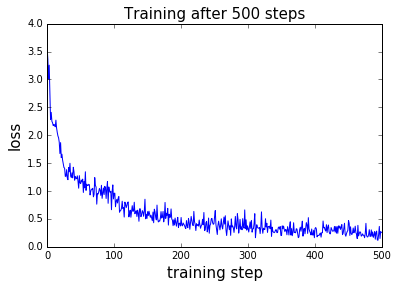

In [147]:
#let's plot the traning results

#get the records from the database
query = {'train_results': {'$exists': True}}
cursor = coll.find(query).sort('step')

#pull out just the training result loss
result_list = [pluck(rec['train_results'], 'loss') for rec in cursor]

#... and concatenate the 20-step blocks across all saved points
result_traj = np.concatenate(result_list)

#... now plot!
plt.plot(result_traj)
plt.xlabel('training step', fontsize=15)
plt.ylabel('loss', fontsize=15)
plt.title('Training after %d steps' % len(result_traj), fontsize=15)

### Continuing training

In [148]:
#let's do 500 more steps (starting where we left off above, for a total of 1000)

train_params['num_steps'] = 1000

tf_train.train_from_params(save_params=save_params,
                           model_params=model_params,
                           train_params=train_params,
                           loss_params=loss_params,
                           learning_rate_params=learning_rate_params,
                           optimizer_params=optimizer_params,
                           skip_check=True)                           

#notice in the below print out the line:
#   INFO:tfutils:Restoring variables from record 5bb407f761bb4e30f645402d (step 500)...
#this means the training restored the previously saved model where it left off 

INFO:tfutils:thres_loss not specified for model 0... Defaulting thres_loss to: 100.
INFO:tfutils:train_loop not specified for model 0... Using default training loop.
INFO:tfutils:validate_fist not specified for model 0... Defaulting validate_first to: True.
INFO:tfutils:minibatch_size not specified for training data_params... Defaulting minibatch_size to: 100 (identical to the batch size).


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tfutils:Error in directly calling loss_func, trying softmax way!
INFO:tfutils:Initialized from scratch first
INFO:tfutils:Loading checkpoint from cs375_demo_db_cs375_demo_coll_training0___RECENT.fs.files
INFO:tfutils:Cache file found at /home/yamins/.tfutils/localhost:29101/cs375_demo_db/cs375_demo_coll/training0/checkpoint-500, using that to load
INFO:tfutils:Restoring variables from record 5bb407f761bb4e30f645402d (step 500)...
INFO:tfutils:Saved Vars:
['hidden2/bias', 'hidden2/weights/Momentum', 'hidden1/weights', 'Variable_5', 'softmax_linear/weights/Momentum', 'hidden2/weights', 'softmax_linear/weights', 'Variable_4', 'Variable_3', 'softmax_linear/bias', 'Variable_1', 'softmax_linear/bias/Momentum', 'Variable', 'global_step', 'hidden2/bias/Momentum', 'hidden1/bias', 'hidden1/weights/Momentum', 'hidden1/bias/Momentum', 'Variable_2']
INFO:tfutils:No variable mapping specified.
INFO:tfutils:Saved shapes:
{'hidden2/weights/Momentum

global_step
hidden2/weights/Momentum
hidden1/weights/Momentum
Variable_5
softmax_linear/weights/Momentum
hidden2/weights
softmax_linear/weights
Variable_4
Variable_3
softmax_linear/bias
hidden2/bias
softmax_linear/bias/Momentum
Variable
hidden2/bias/Momentum
hidden1/bias
hidden1/weights
hidden1/bias/Momentum
Variable_1
Variable_2
INFO:tensorflow:Restoring parameters from /home/yamins/.tfutils/localhost:29101/cs375_demo_db/cs375_demo_coll/training0/checkpoint-500


INFO:tensorflow:Restoring parameters from /home/yamins/.tfutils/localhost:29101/cs375_demo_db/cs375_demo_coll/training0/checkpoint-500
INFO:tfutils:... done restoring.
INFO:tfutils:Unrestored Vars:
[]
INFO:tfutils:Training beginning ...
INFO:tfutils:Step 501 (600 ms) -- loss: 0.2741, learning_rate: 0.0387
INFO:tfutils:Step 502 (11 ms) -- loss: 0.3476, learning_rate: 0.0387
INFO:tfutils:Step 503 (7 ms) -- loss: 0.3048, learning_rate: 0.0387
INFO:tfutils:Step 504 (8 ms) -- loss: 0.1706, learning_rate: 0.0387
INFO:tfutils:Step 505 (9 ms) -- loss: 0.2058, learning_rate: 0.0387
INFO:tfutils:Step 506 (8 ms) -- loss: 0.2384, learning_rate: 0.0387
INFO:tfutils:Step 507 (10 ms) -- loss: 0.2454, learning_rate: 0.0387
INFO:tfutils:Step 508 (7 ms) -- loss: 0.3131, learning_rate: 0.0387
INFO:tfutils:Step 509 (7 ms) -- loss: 0.1154, learning_rate: 0.0387
INFO:tfutils:Step 510 (8 ms) -- loss: 0.1759, learning_rate: 0.0387
INFO:tfutils:Step 511 (8 ms) -- loss: 0.2881, learning_rate: 0.0387
INFO:tfutil

[[ObjectId('5bb40f4361bb4e30f6454036'),
  ObjectId('5bb40f4461bb4e30f6454037'),
  ObjectId('5bb40f4461bb4e30f6454038'),
  ObjectId('5bb40f4461bb4e30f6454039'),
  ObjectId('5bb40f4461bb4e30f645403a'),
  ObjectId('5bb40f4461bb4e30f6454040'),
  ObjectId('5bb40f4461bb4e30f6454041'),
  ObjectId('5bb40f4561bb4e30f6454042'),
  ObjectId('5bb40f4561bb4e30f6454043'),
  ObjectId('5bb40f4561bb4e30f645404a'),
  ObjectId('5bb40f4561bb4e30f645404b'),
  ObjectId('5bb40f4561bb4e30f645404c'),
  ObjectId('5bb40f4561bb4e30f645404d'),
  ObjectId('5bb40f4661bb4e30f645404e'),
  ObjectId('5bb40f4661bb4e30f645404f'),
  ObjectId('5bb40f4661bb4e30f6454055'),
  ObjectId('5bb40f4661bb4e30f6454056'),
  ObjectId('5bb40f4661bb4e30f6454057'),
  ObjectId('5bb40f4661bb4e30f6454058'),
  ObjectId('5bb40f4761bb4e30f645405f'),
  ObjectId('5bb40f4761bb4e30f6454060'),
  ObjectId('5bb40f4761bb4e30f6454061'),
  ObjectId('5bb40f4761bb4e30f6454062'),
  ObjectId('5bb40f4761bb4e30f6454063'),
  ObjectId('5bb40f4761bb4e30f6454064')]]

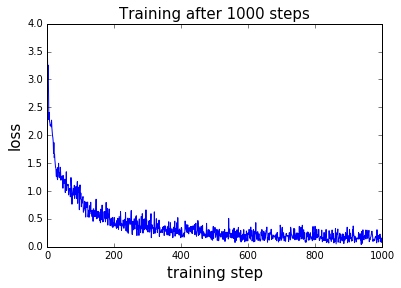

In [149]:
#now when we plot we get all 1000 steps

query = {'train_results': {'$exists': True}}
cursor = coll.find(query).sort('step')
result_list = [pluck(rec['train_results'], 'loss') for rec in cursor]
result_traj = np.concatenate(result_list)

plt.plot(result_traj)
plt.xlabel('training step', fontsize=15)
plt.ylabel('loss', fontsize=15)
plt.title('Training after %d steps' % len(result_traj), fontsize=15)

### Diverging to a new experiment ID

In [150]:
#do 500 more steps, but this time save to a new experiment ID
train_params['num_steps'] = 1500
load_params = {'exp_id': 'training0'}  #address to load from
save_params['exp_id'] = 'training1'    #address to save to

tf_train.train_from_params(save_params=save_params,
                           load_params=load_params,
                           model_params=model_params,
                           train_params=train_params,
                           loss_params=loss_params,
                           learning_rate_params=learning_rate_params,
                           optimizer_params=optimizer_params,
                           skip_check=True)                       

#again notice the printout line:
#   INFO:tfutils:Restoring variables from record 5bb40f4761bb4e30f6454064 (step 1000)...


INFO:tfutils:thres_loss not specified for model 0... Defaulting thres_loss to: 100.
INFO:tfutils:train_loop not specified for model 0... Using default training loop.
INFO:tfutils:validate_fist not specified for model 0... Defaulting validate_first to: True.
INFO:tfutils:minibatch_size not specified for training data_params... Defaulting minibatch_size to: 100 (identical to the batch size).


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tfutils:Error in directly calling loss_func, trying softmax way!
INFO:tfutils:Initialized from scratch first
INFO:tfutils:Loading checkpoint from cs375_demo_db.cs375_demo_coll.files
INFO:tfutils:No cache file at /home/yamins/.tfutils/localhost:29101/cs375_demo_db/cs375_demo_coll/training1/checkpoint-1000.tar, loading from DB
INFO:tfutils:Restoring variables from record 5bb40f4761bb4e30f6454064 (step 1000)...
INFO:tfutils:Saved Vars:
['hidden2/bias', 'hidden2/weights/Momentum', 'hidden1/weights', 'Variable_5', 'softmax_linear/weights/Momentum', 'hidden2/weights', 'softmax_linear/weights', 'Variable_4', 'Variable_3', 'softmax_linear/bias', 'Variable_1', 'softmax_linear/bias/Momentum', 'Variable', 'global_step', 'hidden2/bias/Momentum', 'hidden1/bias', 'hidden1/weights/Momentum', 'hidden1/bias/Momentum', 'Variable_2']
INFO:tfutils:No variable mapping specified.
INFO:tfutils:Saved shapes:
{'hidden2/weights/Momentum': [128, 32], 'Variabl

global_step
hidden2/weights/Momentum
hidden1/weights/Momentum
Variable_5
softmax_linear/weights/Momentum
hidden2/weights
softmax_linear/weights
Variable_4
Variable_3
softmax_linear/bias
hidden2/bias
softmax_linear/bias/Momentum
Variable
hidden2/bias/Momentum
hidden1/bias
hidden1/weights
hidden1/bias/Momentum
Variable_1
Variable_2
INFO:tensorflow:Restoring parameters from /home/yamins/.tfutils/localhost:29101/cs375_demo_db/cs375_demo_coll/training1/checkpoint-1000


INFO:tensorflow:Restoring parameters from /home/yamins/.tfutils/localhost:29101/cs375_demo_db/cs375_demo_coll/training1/checkpoint-1000
INFO:tfutils:... done restoring.
INFO:tfutils:Unrestored Vars:
[]
INFO:tfutils:Training beginning ...
INFO:tfutils:Step 1001 (658 ms) -- loss: 0.1614, learning_rate: 0.0299
INFO:tfutils:Step 1002 (7 ms) -- loss: 0.2643, learning_rate: 0.0299
INFO:tfutils:Step 1003 (8 ms) -- loss: 0.1630, learning_rate: 0.0299
INFO:tfutils:Step 1004 (10 ms) -- loss: 0.1063, learning_rate: 0.0299
INFO:tfutils:Step 1005 (8 ms) -- loss: 0.2376, learning_rate: 0.0299
INFO:tfutils:Step 1006 (9 ms) -- loss: 0.2215, learning_rate: 0.0299
INFO:tfutils:Step 1007 (11 ms) -- loss: 0.1289, learning_rate: 0.0299
INFO:tfutils:Step 1008 (9 ms) -- loss: 0.1602, learning_rate: 0.0299
INFO:tfutils:Step 1009 (8 ms) -- loss: 0.0638, learning_rate: 0.0299
INFO:tfutils:Step 1010 (7 ms) -- loss: 0.0512, learning_rate: 0.0299
INFO:tfutils:Step 1011 (7 ms) -- loss: 0.1211, learning_rate: 0.0299

[[ObjectId('5bb40fda61bb4e30f645406b'),
  ObjectId('5bb40fda61bb4e30f645406c'),
  ObjectId('5bb40fda61bb4e30f645406d'),
  ObjectId('5bb40fda61bb4e30f645406e'),
  ObjectId('5bb40fdb61bb4e30f6454075'),
  ObjectId('5bb40fdc61bb4e30f6454076'),
  ObjectId('5bb40fdc61bb4e30f6454077'),
  ObjectId('5bb40fdc61bb4e30f6454078'),
  ObjectId('5bb40fdc61bb4e30f6454079'),
  ObjectId('5bb40fdc61bb4e30f645407a'),
  ObjectId('5bb40fdd61bb4e30f6454080'),
  ObjectId('5bb40fdd61bb4e30f6454081'),
  ObjectId('5bb40fdd61bb4e30f6454082'),
  ObjectId('5bb40fdd61bb4e30f6454083'),
  ObjectId('5bb40fdd61bb4e30f645408a'),
  ObjectId('5bb40fdd61bb4e30f645408b'),
  ObjectId('5bb40fde61bb4e30f645408c'),
  ObjectId('5bb40fde61bb4e30f645408d'),
  ObjectId('5bb40fde61bb4e30f645408e'),
  ObjectId('5bb40fde61bb4e30f645408f'),
  ObjectId('5bb40fde61bb4e30f6454095'),
  ObjectId('5bb40fde61bb4e30f6454096'),
  ObjectId('5bb40fdf61bb4e30f6454097'),
  ObjectId('5bb40fdf61bb4e30f6454098'),
  ObjectId('5bb40fdf61bb4e30f645409f')]]

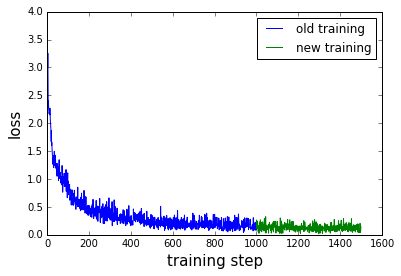

In [172]:
#let's plot the old and new trajectory portions together 

query = {'train_results': {'$exists': True}, 
         'exp_id': 'training0'}
cursor = coll.find(query).sort('step')
result_list = [pluck(rec['train_results'], 'loss') for rec in cursor]
result_traj = np.concatenate(result_list)
line1 = plt.plot(result_traj)
plt.xlabel('training step', fontsize=15)
plt.ylabel('loss', fontsize=15)

start_step = max(coll.find(query).distinct('step'))
query1 = {'train_results': {'$exists': True}, 
          'exp_id': 'training1'}
cursor1 = coll.find(query1).sort('step')
steps = []
result_traj1 = []
for rec in cursor1:
    end_step = rec['step']
    steps.extend(range(start_step, end_step))
    result_traj1.extend(pluck(rec['train_results'], 'loss'))
    start_step = end_step
line2 = plt.plot(steps, result_traj1)

plt.legend([line1[0], line2[0]], ['old training', 'new training'])


### Online validation

In [138]:
import tfutils.utils as tf_utils

In [139]:
#let's do the same training as above, but this time each time we save results, let's
#compute a validation result -- in this case, loss on the held-out test subset 

save_params = {'host': 'localhost',
               'port': 29101,
               'dbname': 'cs375_demo_db',
               'collname': 'cs375_demo_coll',
               'exp_id': 'training2',   #<-- now we're saving to a new exp_id location
               'save_valid_freq': 20,
               'save_filters_freq': 200,
               'cache_filters_freq': 100}
    
BATCH_SIZE = 100
SIZE_OF_DATASET = 10000
train_params = {}
train_params['data_params'] = {'func': mnist_data.build_data,
                               'batch_size': BATCH_SIZE,
                               'group': 'train',
                               'directory': '/mnt/data/yamins/mnist_data'}
train_params['num_steps'] = 500

model_params = {'func': model_tool.mnist_tfutils}

loss_params = {'loss_func': tf.nn.sparse_softmax_cross_entropy_with_logits,
               'agg_func': tf.reduce_mean,
               'pred_targets': 'labels'}
       
optimizer_params = {'optimizer_class': tf.train.MomentumOptimizer,
                    'momentum': 0.9}

learning_rate_params = {'learning_rate': 0.01,
                        'decay_steps': SIZE_OF_DATASET // BATCH_SIZE,
                        'decay_rate': 0.95,
                        'staircase': True}

#while we're training, we want to compute validation loss on the testing subset 
#of the mnist dataset. here's how we create a config which will direct the system
#to do that

validation_params = {'validation': {'data_params': {'func': mnist_data.build_data,
                                                    'batch_size': BATCH_SIZE,
                                                    'group': 'test',
                                                    'directory': '/mnt/data/yamins/mnist_data'},
                                    'num_steps': 10,
                                    'agg_func': tf_utils.mean_dict
                                   }
                    }

In [140]:
#now do the training
tf_train.train_from_params(save_params=save_params,
                           model_params=model_params,
                           train_params=train_params,
                           loss_params=loss_params,
                           learning_rate_params=learning_rate_params,
                           optimizer_params=optimizer_params,
                           validation_params=validation_params,
                           skip_check=True)

#notice the periodic printouts of the form:
#   validation: 100%|██████████| 10/10 [00:00<00:00, 206.52it/s]
#   INFO:tfutils:Validation -- validation: {'loss': 1.6153075}

INFO:tfutils:No seed specified for model 0... Defaulting to seed: 0.
INFO:tfutils:No prefix specified for model 0... Defaulting to prefix: model_0.
INFO:tfutils:No devices specified for model 0... Defaulting to gpus: ['/gpu:0'].
INFO:tfutils:thres_loss not specified for model 0... Defaulting thres_loss to: 100.
INFO:tfutils:train_loop not specified for model 0... Using default training loop.
INFO:tfutils:validate_fist not specified for model 0... Defaulting validate_first to: True.
INFO:tfutils:minibatch_size not specified for training data_params... Defaulting minibatch_size to: 100 (identical to the batch size).


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tfutils:Error in directly calling loss_func, trying softmax way!


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tfutils:Error in directly calling loss_func, trying softmax way!
INFO:tfutils:Initialized from scratch first
INFO:tfutils:Training beginning ...
validation:   0%|          | 0/10 [00:00<?, ?it/s]

global_step
hidden2/weights/Momentum
hidden1/weights/Momentum
Variable_5
softmax_linear/weights/Momentum
hidden2/weights
softmax_linear/weights
Variable_4
Variable_3
softmax_linear/bias
hidden2/bias
softmax_linear/bias/Momentum
Variable
hidden2/bias/Momentum
hidden1/bias
hidden1/weights
hidden1/bias/Momentum
Variable_1
Variable_2


validation: 100%|██████████| 10/10 [00:00<00:00, 90.22it/s]
INFO:tfutils:Validation -- validation: {'loss': 3.3588612}
INFO:tfutils:Saving model with path prefix /home/yamins/.tfutils/localhost:29101/cs375_demo_db/cs375_demo_coll/training4/checkpoint ... 
INFO:tfutils:... done saving with path prefix /home/yamins/.tfutils/localhost:29101/cs375_demo_db/cs375_demo_coll/training4/checkpoint-0
INFO:tfutils:Putting filters into <gridfs.GridFS object at 0x7f04a1885710> database
INFO:tfutils:... done putting filters into database.
INFO:tfutils:Step 1 (518 ms) -- loss: 3.3908, learning_rate: 0.0100
INFO:tfutils:Step 2 (8 ms) -- loss: 2.7322, learning_rate: 0.0100
INFO:tfutils:Step 3 (7 ms) -- loss: 2.8239, learning_rate: 0.0100
INFO:tfutils:Step 4 (6 ms) -- loss: 2.7532, learning_rate: 0.0100
INFO:tfutils:Step 5 (6 ms) -- loss: 2.6299, learning_rate: 0.0100
INFO:tfutils:Step 6 (6 ms) -- loss: 2.6054, learning_rate: 0.0100
INFO:tfutils:Step 7 (7 ms) -- loss: 2.6380, learning_rate: 0.0100
INFO:t

[[ObjectId('5bb4dc1161bb4e4536ad9d25'),
  ObjectId('5bb4dc1261bb4e4536ad9d2b'),
  ObjectId('5bb4dc1261bb4e4536ad9d2c'),
  ObjectId('5bb4dc1261bb4e4536ad9d2d'),
  ObjectId('5bb4dc1261bb4e4536ad9d2e'),
  ObjectId('5bb4dc1361bb4e4536ad9d35'),
  ObjectId('5bb4dc1461bb4e4536ad9d36'),
  ObjectId('5bb4dc1461bb4e4536ad9d37'),
  ObjectId('5bb4dc1461bb4e4536ad9d38'),
  ObjectId('5bb4dc1561bb4e4536ad9d39'),
  ObjectId('5bb4dc1561bb4e4536ad9d3a'),
  ObjectId('5bb4dc1561bb4e4536ad9d40'),
  ObjectId('5bb4dc1561bb4e4536ad9d41'),
  ObjectId('5bb4dc1661bb4e4536ad9d42'),
  ObjectId('5bb4dc1661bb4e4536ad9d43'),
  ObjectId('5bb4dc1661bb4e4536ad9d4a'),
  ObjectId('5bb4dc1661bb4e4536ad9d4b'),
  ObjectId('5bb4dc1661bb4e4536ad9d4c'),
  ObjectId('5bb4dc1761bb4e4536ad9d4d'),
  ObjectId('5bb4dc1761bb4e4536ad9d4e'),
  ObjectId('5bb4dc1761bb4e4536ad9d4f'),
  ObjectId('5bb4dc1761bb4e4536ad9d55'),
  ObjectId('5bb4dc1861bb4e4536ad9d56'),
  ObjectId('5bb4dc1861bb4e4536ad9d57'),
  ObjectId('5bb4dc1861bb4e4536ad9d58'),


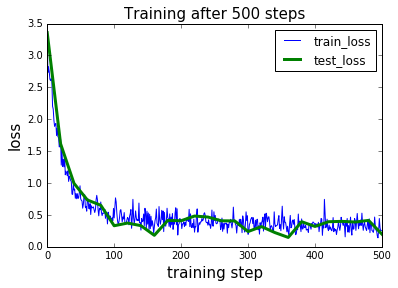

In [141]:
#let's plot training and testing loss together 

query = {'exp_id': 'training2'}

cursor = coll.find(query).sort('step')
    
train_loss = []
test_loss = []
steps = []
for rec in cursor:
    steps.append(rec['step'])
    if 'train_results' in rec:
        train_loss.extend(pluck(rec['train_results'], 'loss'))
    test_loss.append(rec['validation_results']['validation']['loss'])
    
l1 = plt.plot(train_loss)
l2 = plt.plot(steps, test_loss, linewidth=3)
plt.xlabel('training step', fontsize=15)
plt.ylabel('loss', fontsize=15)
plt.title('Training after %d steps' % len(result_traj), fontsize=15)
plt.legend([l1[0], l2[0]], ['train_loss', 'test_loss'])

#ok, overfitting isn't that bad!

#### slightly fancier validation, with custom target

In [114]:
#now let's create a new training run, but this time 
#we want a slightly fancier evaluation to be run at each validation step

save_params['exp_id'] =  'training3'  #<-- new exp_id for the new experiment
    
#specifically let's compute testing accuracy, in terms of percent correct

#to do that, we'll specify a new model target (computed from the model inputs and outputs)
#specifically, we want the category predictions (as well as the loss).

#this function creates tensorflow targets added on to the end of the model computation graph
def get_predictions_labels_and_loss(data, logits):
    labels = data['labels']
    predictions = tf.argmax(input=logits, axis=1)
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels)
    return {'labels': labels, 
            'predictions': predictions,
            'loss': loss}

#this function takes the per-batch results of the target function and
#aggreates across the batches to produce a final output desired
def aggregate_accuracy_and_loss(batch_results):
    labels = np.concatenate(pluck(batch_results, 'labels'))
    predictions = np.concatenate(pluck(batch_results, 'predictions'))
    correct = float((labels == predictions).sum())
    pct_correct = 100. * correct / len(labels)
    loss = np.concatenate(pluck(batch_results, 'loss')).mean()
    return {'percent_correct': pct_correct, 'loss': loss}

validation_params = {'validation': {'data_params': {'func': mnist_data.build_data,
                                                'batch_size': BATCH_SIZE,
                                                'group': 'test',
                                                'directory': '/mnt/data/yamins/mnist_data'},
                               'num_steps': 10,
                               'targets': {'func': get_predictions_labels_and_loss},
                               'agg_func': aggregate_accuracy_and_loss
                              }
                     }

In [115]:
tf_train.train_from_params(save_params=save_params,
                           model_params=model_params,
                           train_params=train_params,
                           loss_params=loss_params,
                           learning_rate_params=learning_rate_params,
                           optimizer_params=optimizer_params,
                           validation_params=validation_params,
                           skip_check=True)                           

INFO:tfutils:No seed specified for model 0... Defaulting to seed: 0.
INFO:tfutils:No prefix specified for model 0... Defaulting to prefix: model_0.
INFO:tfutils:No devices specified for model 0... Defaulting to gpus: ['/gpu:0'].
INFO:tfutils:thres_loss not specified for model 0... Defaulting thres_loss to: 100.
INFO:tfutils:train_loop not specified for model 0... Using default training loop.
INFO:tfutils:validate_fist not specified for model 0... Defaulting validate_first to: True.
INFO:tfutils:minibatch_size not specified for training data_params... Defaulting minibatch_size to: 100 (identical to the batch size).


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tfutils:Error in directly calling loss_func, trying softmax way!


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tfutils:Initialized from scratch first
INFO:tfutils:Training beginning ...
validation:   0%|          | 0/10 [00:00<?, ?it/s]

global_step
hidden2/weights/Momentum
hidden1/weights/Momentum
Variable_5
softmax_linear/weights/Momentum
hidden2/weights
softmax_linear/weights
Variable_4
Variable_3
softmax_linear/bias
hidden2/bias
softmax_linear/bias/Momentum
Variable
hidden2/bias/Momentum
hidden1/bias
hidden1/weights
hidden1/bias/Momentum
Variable_1
Variable_2


validation: 100%|██████████| 10/10 [00:00<00:00, 97.38it/s]
INFO:tfutils:Validation -- validation: {'loss': 4.653963, 'percent_correct': 8.6}
INFO:tfutils:Saving model with path prefix /home/yamins/.tfutils/localhost:29101/cs375_demo_db/cs375_demo_coll/training3/checkpoint ... 
INFO:tfutils:... done saving with path prefix /home/yamins/.tfutils/localhost:29101/cs375_demo_db/cs375_demo_coll/training3/checkpoint-0
INFO:tfutils:Putting filters into <gridfs.GridFS object at 0x7f048aa71e10> database
INFO:tfutils:... done putting filters into database.
INFO:tfutils:Step 1 (628 ms) -- loss: 4.6909, learning_rate: 0.0100
INFO:tfutils:Step 2 (7 ms) -- loss: 3.3906, learning_rate: 0.0100
INFO:tfutils:Step 3 (8 ms) -- loss: 2.4143, learning_rate: 0.0100
INFO:tfutils:Step 4 (7 ms) -- loss: 3.0304, learning_rate: 0.0100
INFO:tfutils:Step 5 (7 ms) -- loss: 3.3260, learning_rate: 0.0100
INFO:tfutils:Step 6 (7 ms) -- loss: 3.0241, learning_rate: 0.0100
INFO:tfutils:Step 7 (7 ms) -- loss: 2.6434, learn

[[ObjectId('5bb441c161bb4e4536ad9ce9'),
  ObjectId('5bb441c261bb4e4536ad9cef'),
  ObjectId('5bb441c261bb4e4536ad9cf0'),
  ObjectId('5bb441c261bb4e4536ad9cf1'),
  ObjectId('5bb441c261bb4e4536ad9cf2'),
  ObjectId('5bb441c361bb4e4536ad9cf9'),
  ObjectId('5bb441c361bb4e4536ad9cfa'),
  ObjectId('5bb441c361bb4e4536ad9cfb'),
  ObjectId('5bb441c361bb4e4536ad9cfc'),
  ObjectId('5bb441c361bb4e4536ad9cfd'),
  ObjectId('5bb441c461bb4e4536ad9cfe'),
  ObjectId('5bb441c461bb4e4536ad9d04'),
  ObjectId('5bb441c461bb4e4536ad9d05'),
  ObjectId('5bb441c461bb4e4536ad9d06'),
  ObjectId('5bb441c561bb4e4536ad9d07'),
  ObjectId('5bb441c561bb4e4536ad9d0e'),
  ObjectId('5bb441c561bb4e4536ad9d0f'),
  ObjectId('5bb441c561bb4e4536ad9d10'),
  ObjectId('5bb441c561bb4e4536ad9d11'),
  ObjectId('5bb441c661bb4e4536ad9d12'),
  ObjectId('5bb441c661bb4e4536ad9d13'),
  ObjectId('5bb441c661bb4e4536ad9d19'),
  ObjectId('5bb441c661bb4e4536ad9d1a'),
  ObjectId('5bb441c661bb4e4536ad9d1b'),
  ObjectId('5bb441c761bb4e4536ad9d1c'),


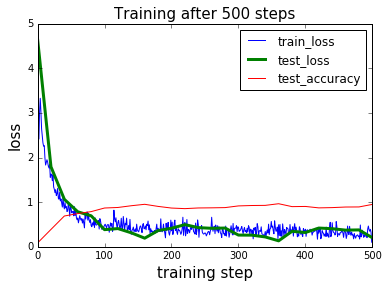

In [136]:
#let's plot our results
#we'll be able to show percent-correct accuracy as well as (cross entropy) loss
#for each validation timepoint

query = {'exp_id': 'training3'}

cursor = coll.find(query).sort('step')
    
train_loss = []
test_loss = []
test_acc = []
steps = []
for rec in cursor:
    steps.append(rec['step'])
    if 'train_results' in rec:
        train_loss.extend(pluck(rec['train_results'], 'loss'))
    test_loss.append(rec['validation_results']['validation']['loss'])
    test_acc.append(rec['validation_results']['validation']['percent_correct'] / 100.)
    
l1 = plt.plot(train_loss)
l2 = plt.plot(steps, test_loss, linewidth=3)
l3 = plt.plot(steps, test_acc)
plt.xlabel('training step', fontsize=15)
plt.ylabel('loss', fontsize=15)
plt.title('Training after %d steps' % len(result_traj), fontsize=15)
plt.legend([l1[0], l2[0], l3[0]], ['train_loss', 'test_loss', 'test_accuracy'])

### Testing

In [26]:
import tfutils.test as tf_test

In [35]:
# a simple testing routine to determine what the testing performance 
# of an existing trained model is

def get_predictions_and_labels(data, logits):
    labels = data['labels']
    predictions = tf.argmax(input=logits, axis=1)
    return {'labels': labels, 'predictions': predictions}

def aggregate_accuracy(batch_results):
    labels = np.concatenate(pluck(batch_results, 'labels'))
    predictions = np.concatenate(pluck(batch_results, 'predictions'))
    correct = float((labels == predictions).sum())
    return {'percent_correct': 100. * correct / len(labels)}

#the address of the model to be loaded
load_params = {'host': 'localhost',
               'port': 29101,
               'dbname': 'cs375_demo_db',
               'collname': 'cs375_demo_coll',
               'exp_id': 'training0'}

#where we want to save results -- of course, we're not training now, 
#but the results will still be saved in the database 
save_params = {'host': 'localhost',
               'port': 29101,
               'dbname': 'cs375_demo_db',
               'collname': 'cs375_demo_coll',
               'exp_id': 'testing0'}
    
model_params = {'func': model_tool.mnist_tfutils}

testing_params = {'test0': {'data_params': {'func': mnist_data.build_data,
                                            'batch_size': BATCH_SIZE,
                                            'group': 'test',
                                            'directory': '/mnt/data/yamins/mnist_data'},
                            'num_steps': 10,
                            'targets': {'func': get_predictions_and_labels},
                            'agg_func': aggregate_accuracy
                           }
                 }


In [36]:
#actually run the test
tf_test.test_from_params(save_params=save_params,
                         load_params=load_params,
                         model_params=model_params,
                         validation_params=testing_params,
                         skip_check=True)

INFO:tfutils:No seed specified for model 0... Defaulting to seed: 0.
INFO:tfutils:No prefix specified for model 0... Defaulting to prefix: model_0.
INFO:tfutils:No devices specified for model 0... Defaulting to gpus: ['/gpu:0'].
INFO:tfutils:Initialized from scratch first
INFO:tfutils:cache_dir not found in load_params, using cache_dir (None) from save_params
INFO:tfutils:Loading checkpoint from cs375_demo_db.cs375_demo_coll.files
INFO:tfutils:Cache file found at /home/yamins/.tfutils/localhost:29101/cs375_demo_db/cs375_demo_coll/training0/checkpoint-1000, using that to load


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tfutils:Loading checkpoint from cs375_demo_db.cs375_demo_coll.files
INFO:tfutils:Cache file found at /home/yamins/.tfutils/localhost:29101/cs375_demo_db/cs375_demo_coll/testing0/checkpoint-1000, using that to load
INFO:tfutils:Restoring variables from record 5bb40f4761bb4e30f6454064 (step 1000)...
INFO:tfutils:Saved Vars:
['hidden2/bias', 'hidden2/weights/Momentum', 'hidden1/weights', 'Variable_5', 'softmax_linear/weights/Momentum', 'hidden2/weights', 'softmax_linear/weights', 'Variable_4', 'Variable_3', 'softmax_linear/bias', 'Variable_1', 'softmax_linear/bias/Momentum', 'Variable', 'global_step', 'hidden2/bias/Momentum', 'hidden1/bias', 'hidden1/weights/Momentum', 'hidden1/bias/Momentum', 'Variable_2']
INFO:tfutils:No variable mapping specified.
INFO:tfutils:Saved shapes:
{'hidden2/weights/Momentum': [128, 32], 'Variable_2': [128, 32], 'hidden1/weights/Momentum': [784, 128], 'softmax_linear/weights': [32, 10], 'softmax_linear/weig

INFO:tensorflow:Restoring parameters from /home/yamins/.tfutils/localhost:29101/cs375_demo_db/cs375_demo_coll/testing0/checkpoint-1000


INFO:tensorflow:Restoring parameters from /home/yamins/.tfutils/localhost:29101/cs375_demo_db/cs375_demo_coll/testing0/checkpoint-1000
INFO:tfutils:... done restoring.
INFO:tfutils:Unrestored Vars:
[]
test0: 100%|██████████| 10/10 [00:00<00:00, 103.10it/s]
INFO:tfutils:Validation -- test0: {'percent_correct': 94.6}
INFO:tfutils:Inserting record into database.


({'test0': {'percent_correct': 94.6}},
 [[ObjectId('5bb431e661bb4e4536ad9c90')]])

In [42]:
#testing record has been inserted into the database

coll = connection['cs375_demo_db']['cs375_demo_coll.files']

query = {'exp_id': 'testing0'}

coll.find(query).count()

2

In [49]:
#notice that this record has two new keys: "validation_results" and "validates"
record = coll.find(query)[0]
record.keys()

[u'validates',
 u'saved_filters',
 u'step',
 u'params',
 u'duration',
 u'exp_id',
 u'_id',
 u'validation_results']

In [50]:
#the validation_results key is the actual result of the test
record['validation_results']

{u'test0': {u'percent_correct': 94.6}}

In [51]:
#the "validates" key tells us exactly what the _id of the model that was loaded
#during the test was (in the database/collection specified by the load_params)
record['validates']

ObjectId('5bb40f4761bb4e30f6454064')

In [55]:
#see... the "validates" _id above is the same _id as the 
#last record in the training trajectory as specified in the load_params above
# ... e.g. the most trained model was used. 

query0 = {'exp_id': 'training0',
          'saved_filters': True}

last_training_record = coll.find(query0).sort('step', -1)[0]

last_training_record['_id']

#if you wanted to actually load not the most recent trained model but some other one
#you can use the "load_query" option (see tfutils documentation)

ObjectId('5bb40f4761bb4e30f6454064')

### Feature extraction and fancy aggregations

In [101]:
#let's use the validation idea to extract some features from the middle of model and compute some 
#aggregate stats of those intermediate feature levels 

#we can set our validation target to be a function that will 
#reach into the computation graph and get features by name of the operation
def get_features_by_name(inputs, outputs, name):
    graph = tf.get_default_graph()
    matches = [t for op in graph.get_operations() for t in op.values() if name in t.name]
    tname = matches[0].name
    features = tf.get_default_graph().get_tensor_by_name(tname)    
    return {name: features}

#... and then as each batch is actually computed, we can compute the on-line mean of the features across
#the images.  Weo do this in an online fashion so we don't actually have to store the entire feature array 
#across all the testing batches (which might get large). Of course we have to store the "count" as well, 
#because we won't know how to do online mean without knowing how to weight each online increment. 
#We'll use the "feature_mean_and_count" function as the "online_agg_func". 
def feature_mean_and_count(agg_res, res, _step):    
    name = res.keys()[0]
    batch_feats = res[name]
    batch_mean = batch_feats.mean(axis=0)
    batch_count = batch_feats.shape[0]
    
    if agg_res is None:
        old_mean = np.zeros_like(batch_mean)
        old_count = 0
    else:
        old_mean = agg_res[name + '_feature_mean']
        old_count = agg_res[name + '_count']
        
    total = old_count + batch_count
    old_frac = float(old_count) / total
    batch_frac = float(batch_count) / total
    
    new_feat_mean = old_frac * old_mean + batch_frac * batch_mean

    return {name + '_feature_mean': new_feat_mean, name + '_count': total}
    
#... and once all the mean has been computed, we can summarize results across the mean feature vector
#at the end of the testing by using "feature_stats" as the "agg_func"
import scipy.stats
def feature_stats(means_and_counts):
    name = [n for n in means_and_counts.keys() if n.endswith('_feature_mean')][0]
    feats = means_and_counts[name]
    
    name_root = name.split('_feature_mean')[0]
    means_and_counts[name_root + '_overall_mean'] = feats.mean()
    means_and_counts[name_root + '_overall_std'] = feats.std()
    means_and_counts[name_root + '_overall_kurtosis'] = scipy.stats.kurtosis(feats)
    
    return means_and_counts
    
load_params = {'host': 'localhost',
               'port': 29101,
               'dbname': 'cs375_demo_db',
               'collname': 'cs375_demo_coll',
               'exp_id': 'training0'}

save_params = {'host': 'localhost',
               'port': 29101,
               'dbname': 'cs375_demo_db',
               'collname': 'cs375_demo_coll',
               'exp_id': 'feature_extraction0'}
    
model_params = {'func': model_tool.mnist_tfutils}

testing_params = {'extraction': {'data_params': {'func': mnist_data.build_data,
                                            'batch_size': BATCH_SIZE,
                                            'group': 'test',
                                            'directory': '/mnt/data/yamins/mnist_data'},
                            'num_steps': 10,
                            'targets': {'func': get_features_by_name, 
                                        'name': 'hidden1_mult'},
                            'online_agg_func': feature_mean_and_count,
                            'agg_func': feature_stats
                           }
                 }


In [102]:
tf_test.test_from_params(save_params=save_params,
                         load_params=load_params,
                         model_params=model_params,
                         validation_params=testing_params,
                         skip_check=True)

INFO:tfutils:No seed specified for model 0... Defaulting to seed: 0.
INFO:tfutils:No prefix specified for model 0... Defaulting to prefix: model_0.
INFO:tfutils:No devices specified for model 0... Defaulting to gpus: ['/gpu:0'].
INFO:tfutils:Initialized from scratch first
INFO:tfutils:cache_dir not found in load_params, using cache_dir (None) from save_params
INFO:tfutils:Loading checkpoint from cs375_demo_db.cs375_demo_coll.files
INFO:tfutils:Cache file found at /home/yamins/.tfutils/localhost:29101/cs375_demo_db/cs375_demo_coll/training0/checkpoint-1000, using that to load


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tfutils:Loading checkpoint from cs375_demo_db.cs375_demo_coll.files
INFO:tfutils:Cache file found at /home/yamins/.tfutils/localhost:29101/cs375_demo_db/cs375_demo_coll/feature_extraction0/checkpoint-1000, using that to load
INFO:tfutils:Restoring variables from record 5bb40f4761bb4e30f6454064 (step 1000)...
INFO:tfutils:Saved Vars:
['hidden2/bias', 'hidden2/weights/Momentum', 'hidden1/weights', 'Variable_5', 'softmax_linear/weights/Momentum', 'hidden2/weights', 'softmax_linear/weights', 'Variable_4', 'Variable_3', 'softmax_linear/bias', 'Variable_1', 'softmax_linear/bias/Momentum', 'Variable', 'global_step', 'hidden2/bias/Momentum', 'hidden1/bias', 'hidden1/weights/Momentum', 'hidden1/bias/Momentum', 'Variable_2']
INFO:tfutils:No variable mapping specified.
INFO:tfutils:Saved shapes:
{'hidden2/weights/Momentum': [128, 32], 'Variable_2': [128, 32], 'hidden1/weights/Momentum': [784, 128], 'softmax_linear/weights': [32, 10], 'softmax_

INFO:tensorflow:Restoring parameters from /home/yamins/.tfutils/localhost:29101/cs375_demo_db/cs375_demo_coll/feature_extraction0/checkpoint-1000


INFO:tensorflow:Restoring parameters from /home/yamins/.tfutils/localhost:29101/cs375_demo_db/cs375_demo_coll/feature_extraction0/checkpoint-1000
INFO:tfutils:... done restoring.
INFO:tfutils:Unrestored Vars:
[]
extraction: 100%|██████████| 10/10 [00:00<00:00, 132.60it/s]
INFO:tfutils:Validation -- extraction: {'hidden1_mult_overall_kurtosis': -0.23122639468041672, 'hidden1_mult_count': 1000, 'hidden1_mult_feature_mean': array([-7.74951   , -2.5517943 , -6.280184  , -3.326851  , -4.6535263 ,
       -0.41449055, -4.503318  , -5.5593677 , -0.43863484, -2.4431329 ,
       -1.4771256 , -2.8501475 , -0.8551421 , -1.5471531 , -2.8608446 ,
       -1.0770491 , -1.2894019 , -3.6048484 , -9.301761  , -4.309949  ,
       -2.0175314 , -3.4045763 , -5.4969134 , -2.566234  , -2.3423486 ,
       -6.8144603 , -1.8500817 , -7.8329816 , -1.2888482 , -2.4958997 ,
       -1.9744706 , -4.538874  , -6.3041835 , -1.4049705 , -5.2057486 ,
       -1.36474   , -1.806823  , -6.320808  , -1.2567749 , -2.8741987 ,

({'extraction': {'hidden1_mult_count': 1000,
   'hidden1_mult_feature_mean': array([-7.74951   , -2.5517943 , -6.280184  , -3.326851  , -4.6535263 ,
          -0.41449055, -4.503318  , -5.5593677 , -0.43863484, -2.4431329 ,
          -1.4771256 , -2.8501475 , -0.8551421 , -1.5471531 , -2.8608446 ,
          -1.0770491 , -1.2894019 , -3.6048484 , -9.301761  , -4.309949  ,
          -2.0175314 , -3.4045763 , -5.4969134 , -2.566234  , -2.3423486 ,
          -6.8144603 , -1.8500817 , -7.8329816 , -1.2888482 , -2.4958997 ,
          -1.9744706 , -4.538874  , -6.3041835 , -1.4049705 , -5.2057486 ,
          -1.36474   , -1.806823  , -6.320808  , -1.2567749 , -2.8741987 ,
          -5.179434  , -7.146755  , -5.527595  , -2.4792092 , -2.87236   ,
          -1.5871456 , -1.4173734 , -7.308442  , -3.1743455 , -4.102586  ,
          -1.1958982 , -2.6821856 , -1.2451968 , -2.7597086 , -1.459789  ,
          -4.492994  , -0.98664194, -1.0648582 , -2.6691697 , -2.2636504 ,
          -0.84308314, -2.

In [88]:
coll = connection['cs375_demo_db']['cs375_demo_coll.files']

query = {'exp_id': 'feature_extraction0'}

coll.find(query).count()

2

In [105]:
record = coll.find(query)[0]
record.keys()

[u'validates',
 u'saved_filters',
 u'step',
 u'params',
 u'duration',
 u'exp_id',
 u'_id',
 u'validation_results']

In [106]:
record['validation_results']['extraction'].keys()

[u'hidden1_mult_overall_kurtosis',
 u'hidden1_mult_count',
 u'hidden1_mult_feature_mean',
 u'hidden1_mult_overall_std',
 u'hidden1_mult_overall_mean']

In [96]:
feat_mean = np.array(record['validation_results']['extraction']['hidden1_mult_feature_mean'])

In [97]:
feat_mean.shape

(128,)

In [98]:
record['validation_results']['extraction']['hidden1_mult_count']

1000